# Vehicle Insurance Fraud Detection
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated. The goal of this project is to use the collection of features to predict whether or not a claim is fraudulent.

# About this dataset
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is whether claim application is fraudulent or not - FraudFound_P

## 1. Import and Read

In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, make_scorer
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# SMOTE library
from collections import Counter
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

%pip install imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
orig_url="https://drive.google.com/file/d/1vvJdGZr935i5wDAFh2s0s8NUM5O0ni9n/view?usp=drive_link" # share link to data set

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [ ]:
df['FraudFound_P'].shape

(15420,)

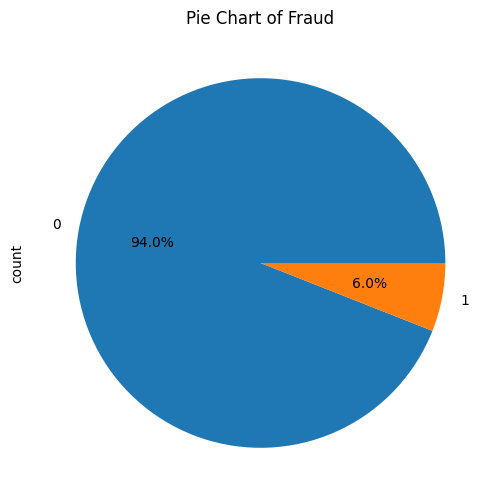

In [ ]:
df['FraudFound_P'].value_counts()
plt.figure(figsize=(10,6))
df['FraudFound_P'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Fraud')
plt.show()

In [ ]:
print(df.dtypes)  # Displays data types of each column


Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

## 2. Find Missing Values

In [ ]:
print(df.isnull().any())  # Count of missing values per column


Month                   False
WeekOfMonth             False
DayOfWeek               False
Make                    False
AccidentArea            False
DayOfWeekClaimed        False
MonthClaimed            False
WeekOfMonthClaimed      False
Sex                     False
MaritalStatus           False
Age                     False
Fault                   False
PolicyType              False
VehicleCategory         False
VehiclePrice            False
FraudFound_P            False
PolicyNumber            False
RepNumber               False
Deductible              False
DriverRating            False
Days_Policy_Accident    False
Days_Policy_Claim       False
PastNumberOfClaims      False
AgeOfVehicle            False
AgeOfPolicyHolder       False
PoliceReportFiled       False
WitnessPresent          False
AgentType               False
NumberOfSuppliments     False
AddressChange_Claim     False
NumberOfCars            False
Year                    False
BasePolicy              False
dtype: boo

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100  # Missing value percentage
print(missing_percentage[missing_percentage > 0])  # Show only columns with missing data



Series([], dtype: float64)


In [ ]:
print(df.nunique())  # Number of unique values per column


Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [ ]:
df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [ ]:
df['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [ ]:
# Descriptive statistics for numerical variables
num_cols = ["WeekOfMonth", "WeekOfMonthClaimed", "Age", "FraudFound_P","RepNumber", "Deductible", "DriverRating", "Year"] #separate numerical columns
df[num_cols].describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

          RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  
mean       8.483268    407.704280      2.487808   1994.866472  
std        4.599948     43.950998      1.119453      0.803313  
min        1.000000    300.000000      1.000000   1994.000000  
25%        5.000000    400.000000      1.000000   1994.000000  
50%        8.000000    400.000000      2.000000   1995.000000  
75%       12.000000    400.000000      3.000000   1996.000000  
max       16.000000    700.000000      4.000000   1996.000000

<h4> Observations:

- There is observation with Age of '0' which is impossible. Therefore we can impute this later with the Average Age of 40.

In [ ]:
print(df.describe(include=['object']))  # Summary of categorical variables
cat_cols = ['Month',
    'DayOfWeek',
    'Make',
    'AccidentArea',
    'DayOfWeekClaimed',
    'MonthClaimed',
    'Sex',
    'MaritalStatus',
    'Fault',
    'PolicyType',
    'VehicleCategory',
    'VehiclePrice',
    'Days_Policy_Accident',
    'Days_Policy_Claim',
    'PastNumberOfClaims',
    'AgeOfVehicle',
    'AgeOfPolicyHolder',
    'PoliceReportFiled',
    'WitnessPresent',
    'AgentType',
    'NumberOfSuppliments',
    'AddressChange_Claim',
    'NumberOfCars',
    'BasePolicy']
df[cat_cols].head()


        Month DayOfWeek     Make AccidentArea DayOfWeekClaimed MonthClaimed  \
count   15420     15420    15420        15420            15420        15420   
unique     12         7       19            2                8           13   
top       Jan    Monday  Pontiac        Urban           Monday          Jan   
freq     1411      2616     3837        13822             3757         1446   

          Sex MaritalStatus          Fault         PolicyType  ...  \
count   15420         15420          15420              15420  ...   
unique      2             4              2                  9  ...   
top      Male       Married  Policy Holder  Sedan - Collision  ...   
freq    13000         10625          11230               5584  ...   

       PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled  \
count               15420        15420             15420             15420   
unique                  4            8                 9                 2   
top                

Month  DayOfWeek    Make AccidentArea DayOfWeekClaimed MonthClaimed     Sex  \
0   Dec  Wednesday   Honda        Urban          Tuesday          Jan  Female   
1   Jan  Wednesday   Honda        Urban           Monday          Jan    Male   
2   Oct     Friday   Honda        Urban         Thursday          Nov    Male   
3   Jun   Saturday  Toyota        Rural           Friday          Jul    Male   
4   Jan     Monday   Honda        Urban          Tuesday          Feb  Female   

  MaritalStatus          Fault         PolicyType  ... PastNumberOfClaims  \
0        Single  Policy Holder  Sport - Liability  ...               none   
1        Single  Policy Holder  Sport - Collision  ...               none   
2       Married  Policy Holder  Sport - Collision  ...                  1   
3       Married    Third Party  Sedan - Liability  ...                  1   
4        Single    Third Party  Sport - Collision  ...               none   

  AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0      3 years          26 to 30                No             No  External   
1      6 years          31 to 35               Yes             No  External   
2      7 years          41 to 50                No             No  External   
3  more than 7          51 to 65               Yes             No  External   
4      5 years          31 to 35                No             No  External   

  NumberOfSuppliments AddressChange_Claim NumberOfCars BasePolicy  
0                none              1 year       3 to 4  Liability  
1                none           no change    1 vehicle  Collision  
2                none           no change    1 vehicle  Collision  
3         more than 5           no change    1 vehicle  Liability  
4                none           no change    1 vehicle  Collision  

[5 rows x 24 columns]

**Obervations**

- Accident Area, Sex, Fault, PoliceReportFiled, WitnessPresent, AgentType is binary --> Therefore, we can map 0 and 1 later on. Other Categorical Columns can applied with Get Dummies

In [ ]:
# Drop policy number
df=df.drop(['PolicyNumber'], axis=1)

<h1> 3. Histograms of Quantitative Variables

In [ ]:
df.groupby(['FraudFound_P'])[num_cols].mean()

WeekOfMonth  WeekOfMonthClaimed        Age  FraudFound_P  \
FraudFound_P                                                             
0                2.792440            2.695799  39.956957           0.0   
1                2.728061            2.665222  38.265439           1.0   

              RepNumber  Deductible  DriverRating         Year  
FraudFound_P                                                    
0              8.492033  407.511899      2.485756  1994.871491  
1              8.345612  410.725894      2.520043  1994.787649

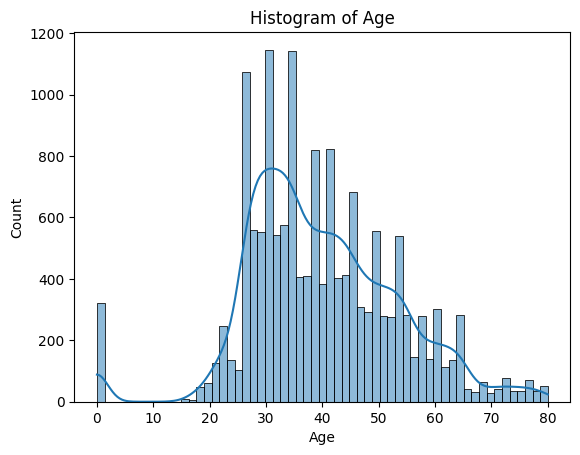

In [ ]:
#plot histogram of age with seaborn
sns.histplot(df["Age"], kde=True)
plt.title(f'Histogram of Age')
plt.show()

<h4>

**Observations** <h4>
- **Age:**
  - Some observations are 0 of Age which is impossible. Age are almost normally distributed with the Mean around the Age of 40.

<h1> 4. Data Visualization for Categorical Vars

<h2> Univariate Analysis <h2

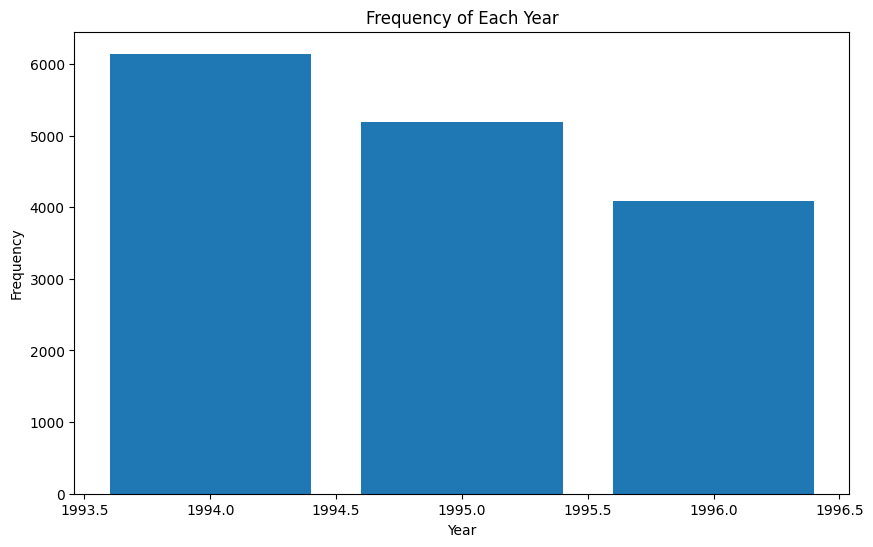

In [ ]:
# Let's take a closer look at Year var
year_counts = df['Year'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.title('Frequency of Each Year')
plt.show()

In [ ]:
# A function to visualize frequency of each category
def catFreq(df, cat_col):
    cat_counts = df[cat_col].value_counts()
    plt.figure(figsize=(10,6))
    plt.bar(cat_counts.index, cat_counts.values)
    plt.xlabel(cat_col)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Each {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

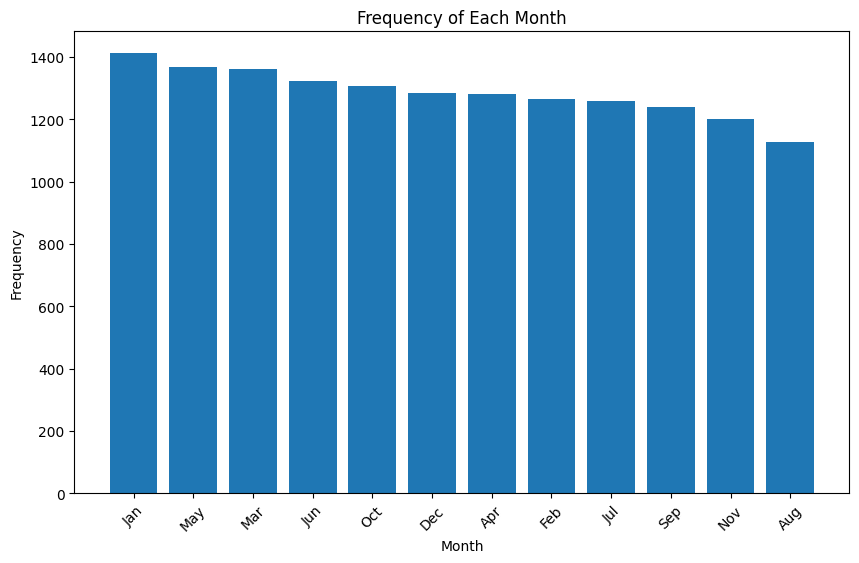

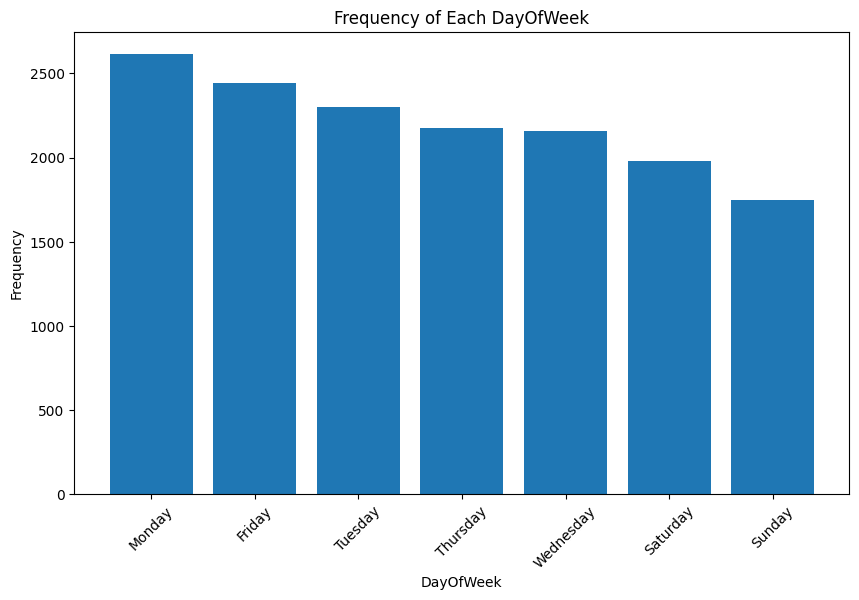

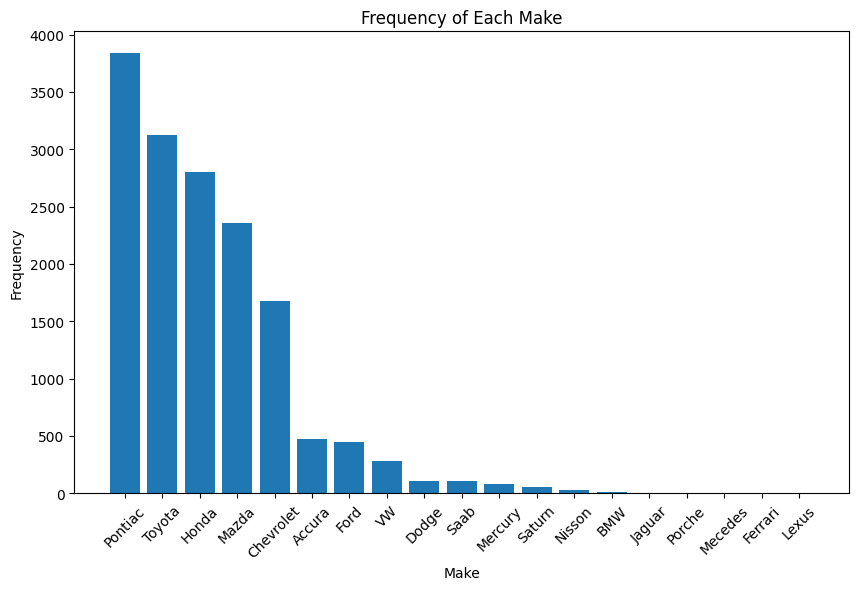

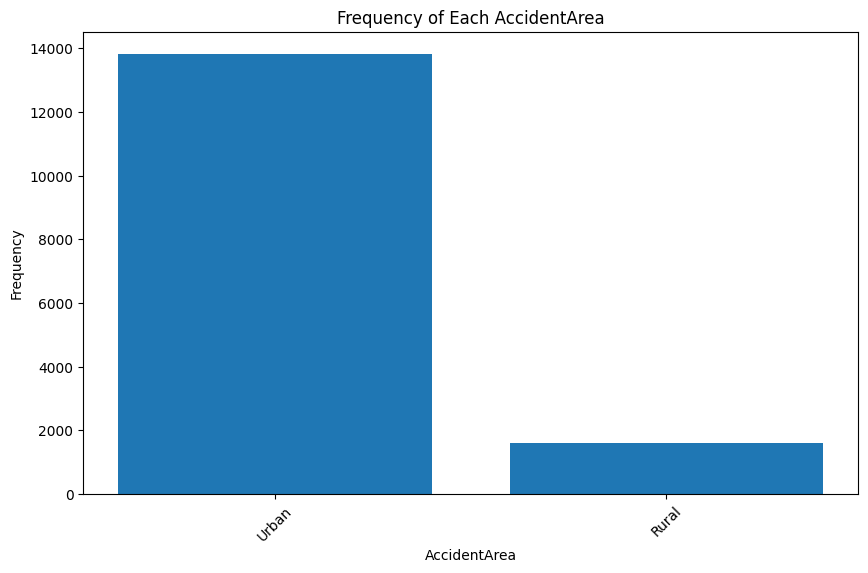

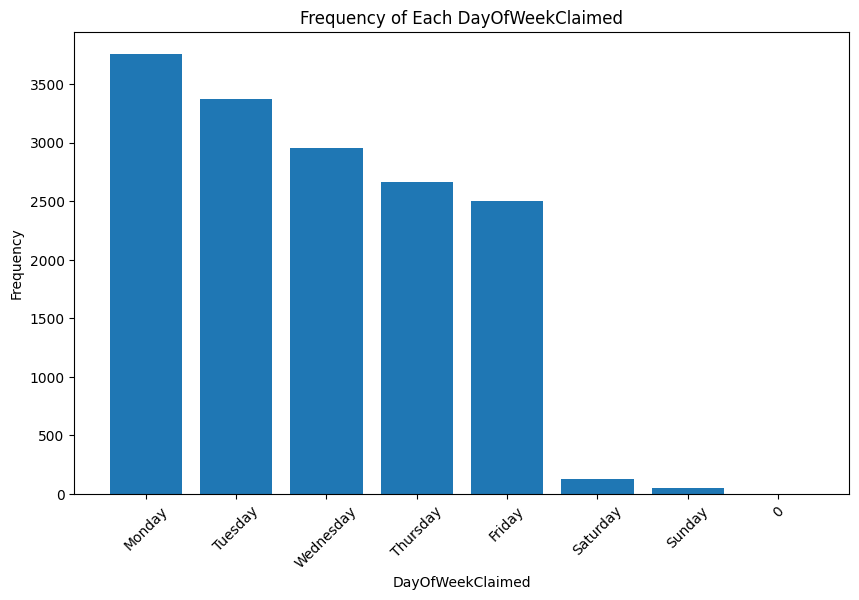

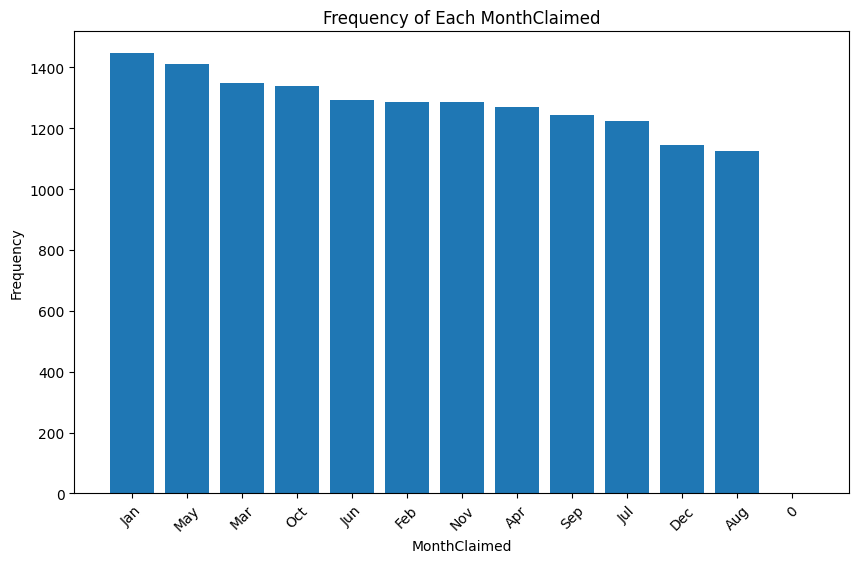

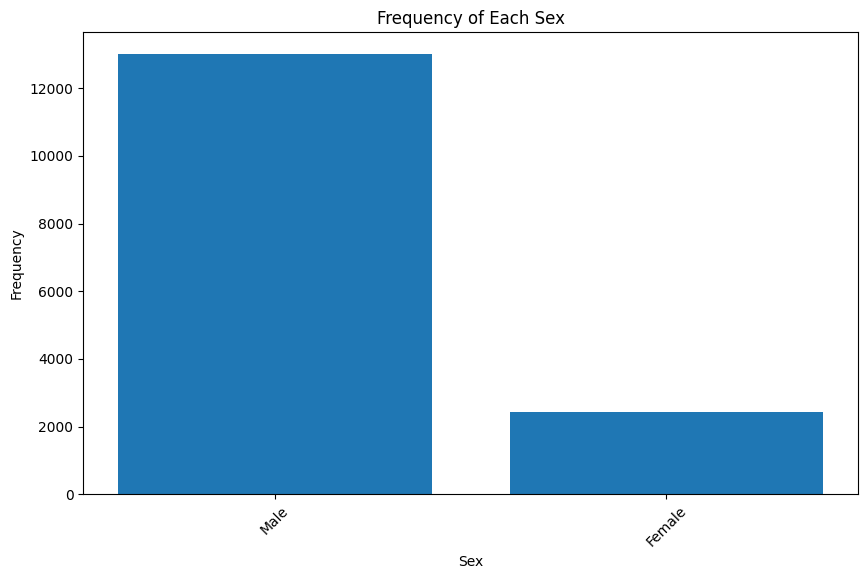

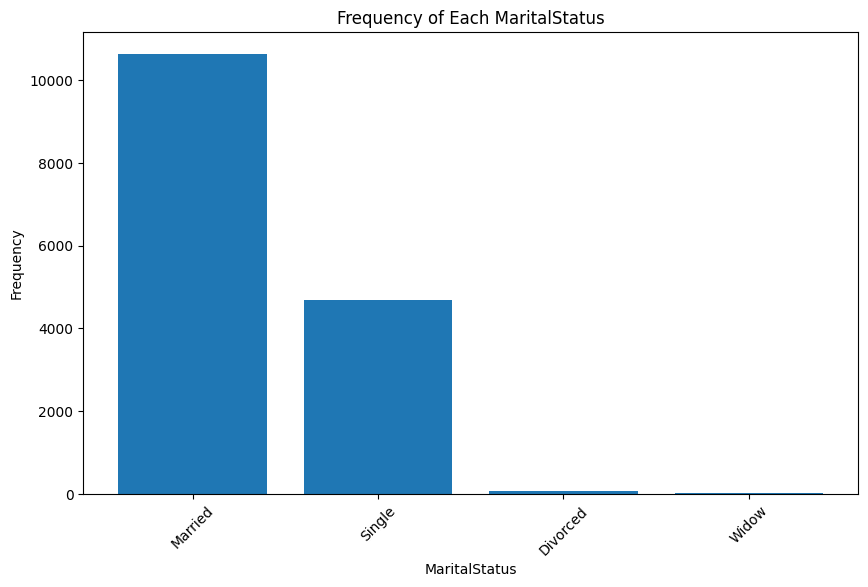

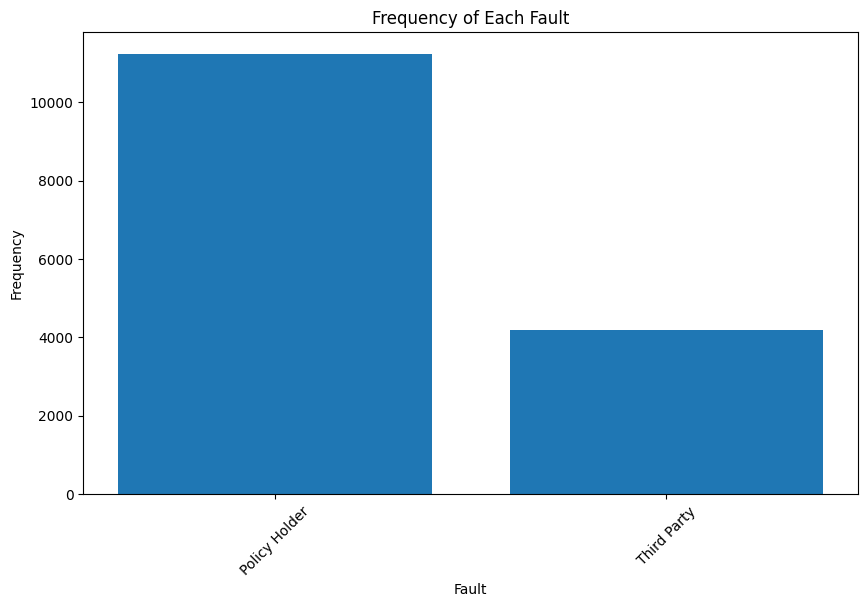

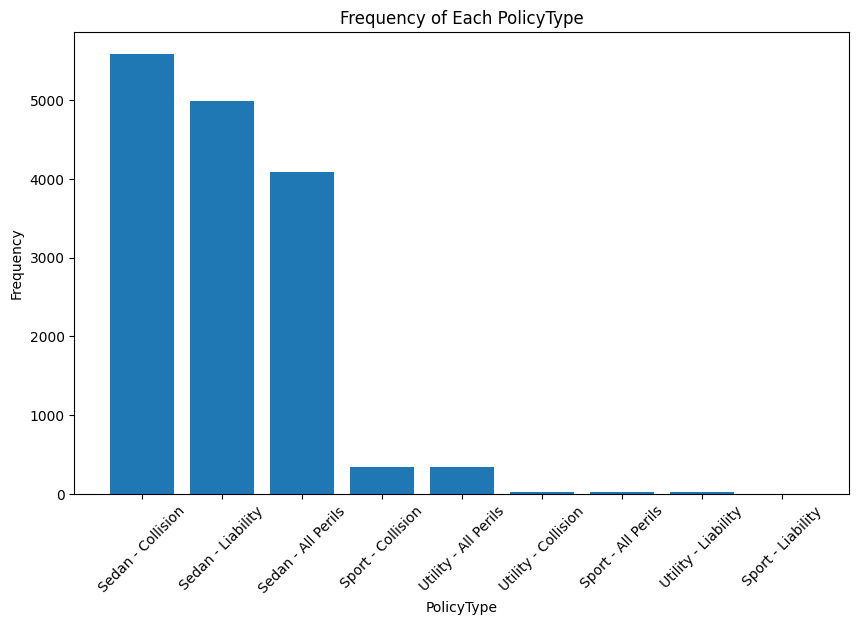

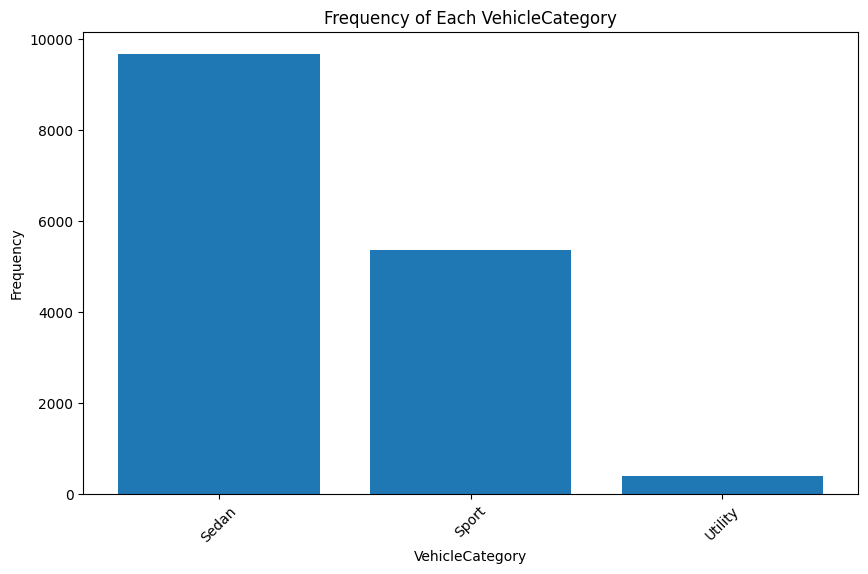

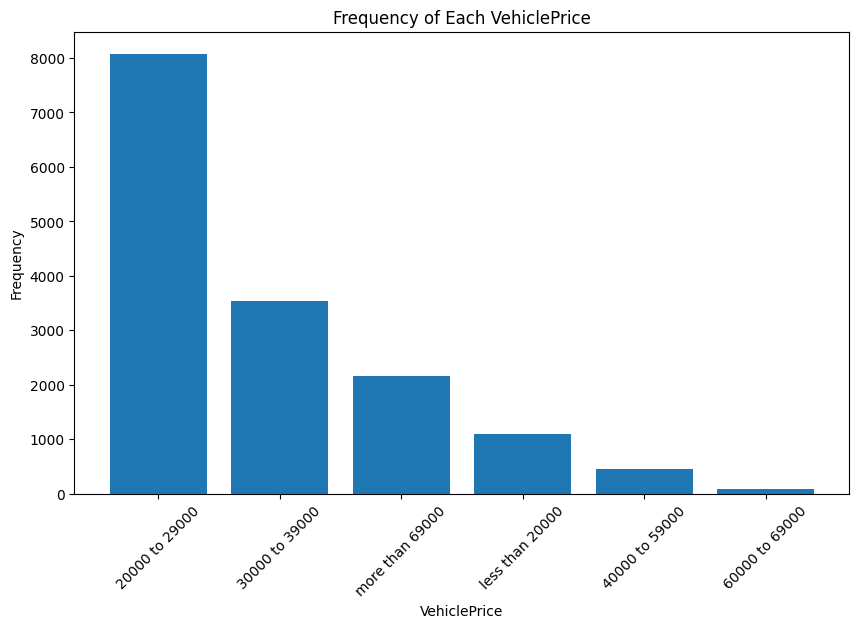

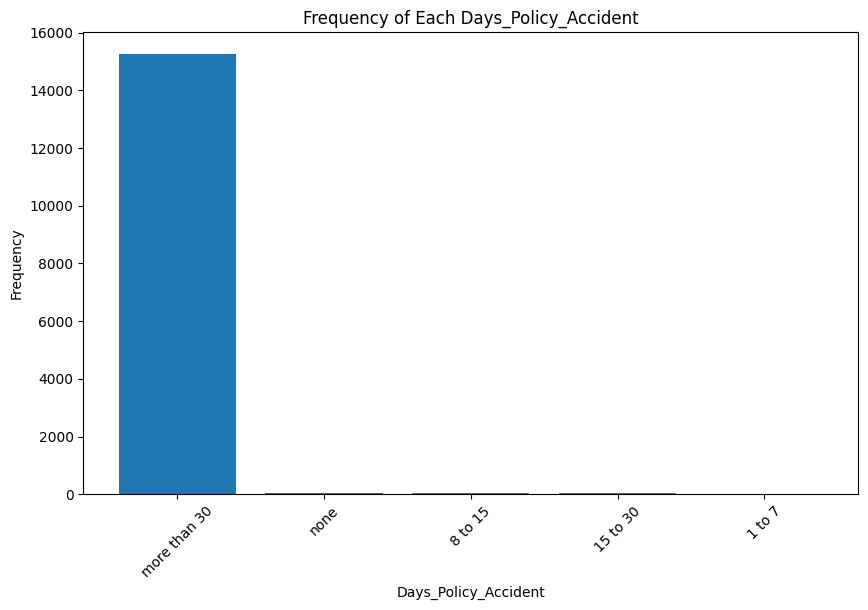

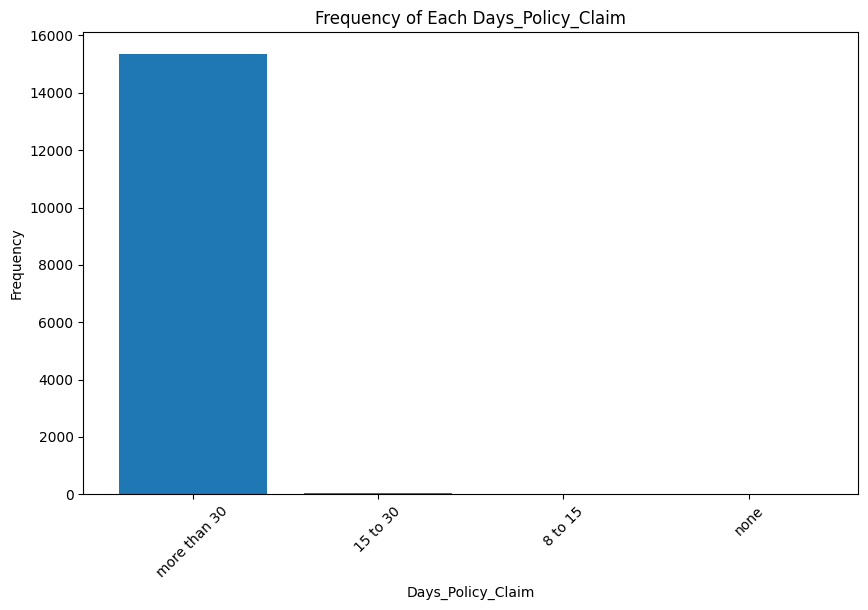

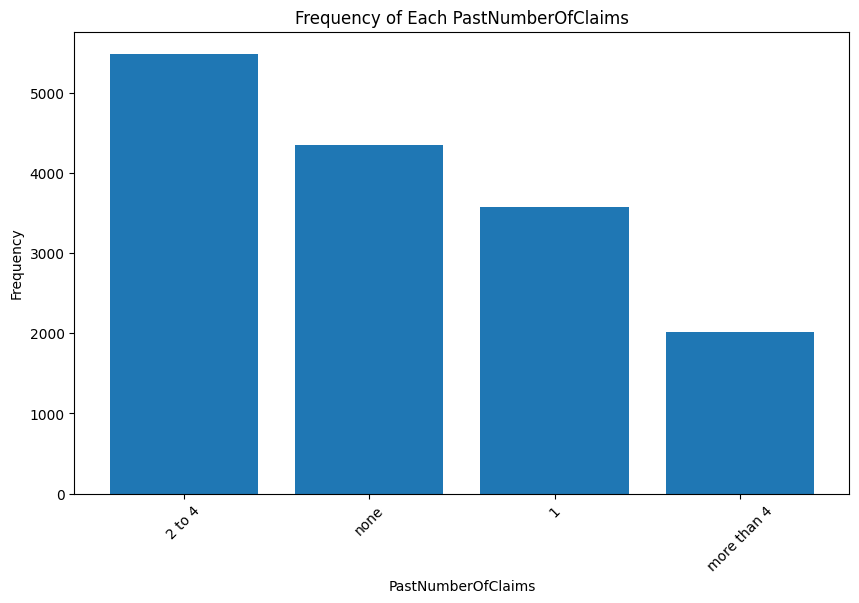

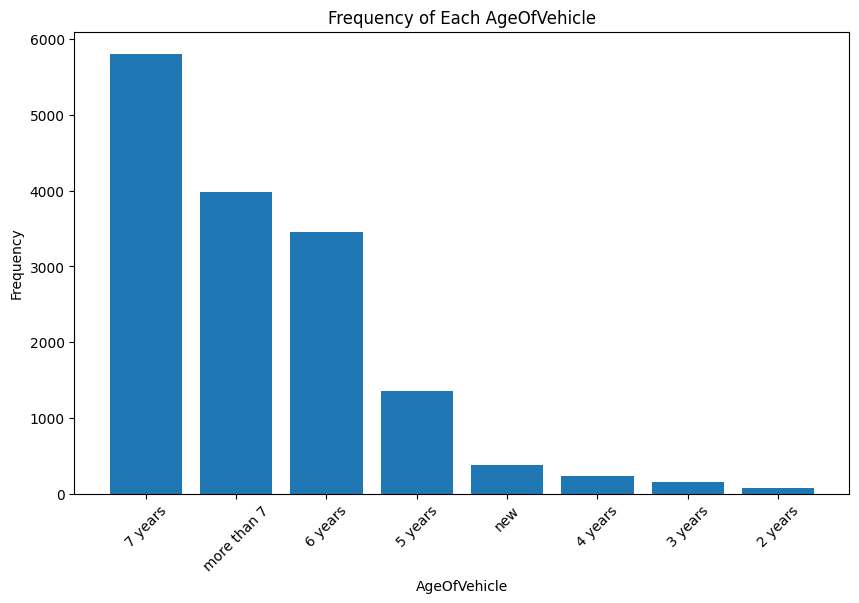

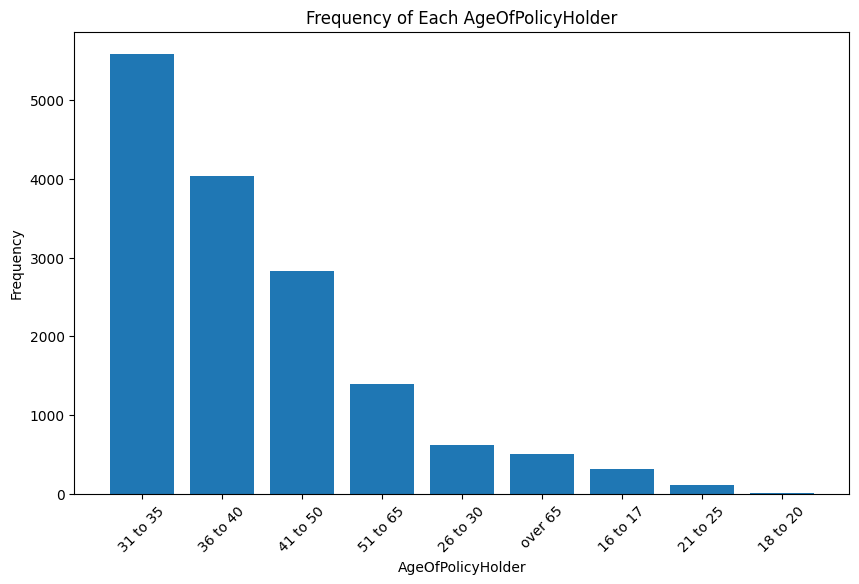

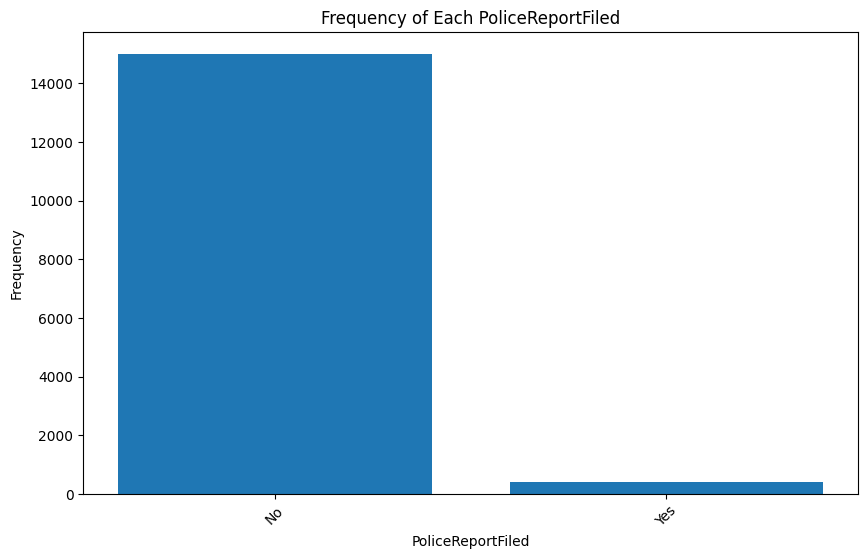

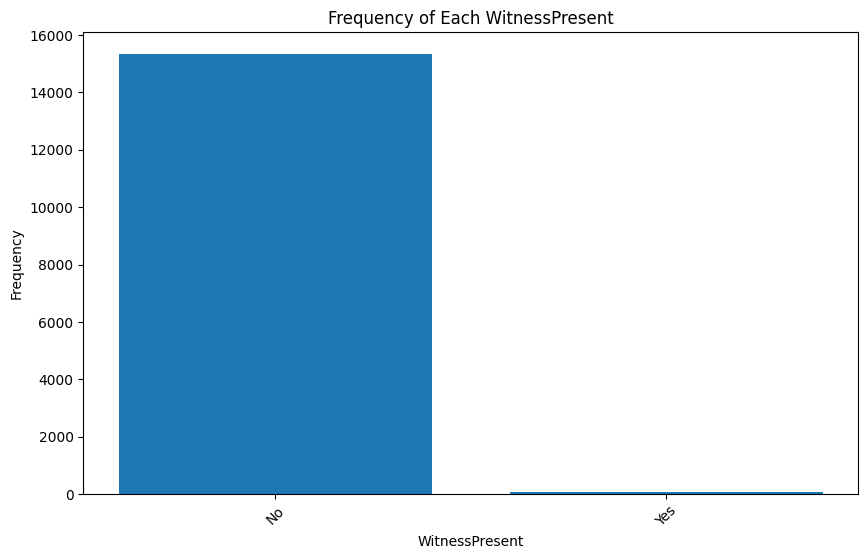

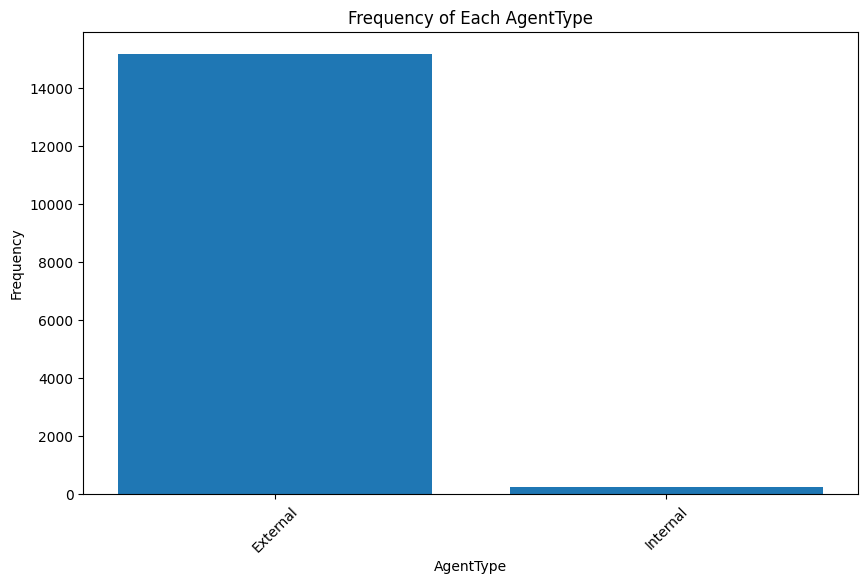

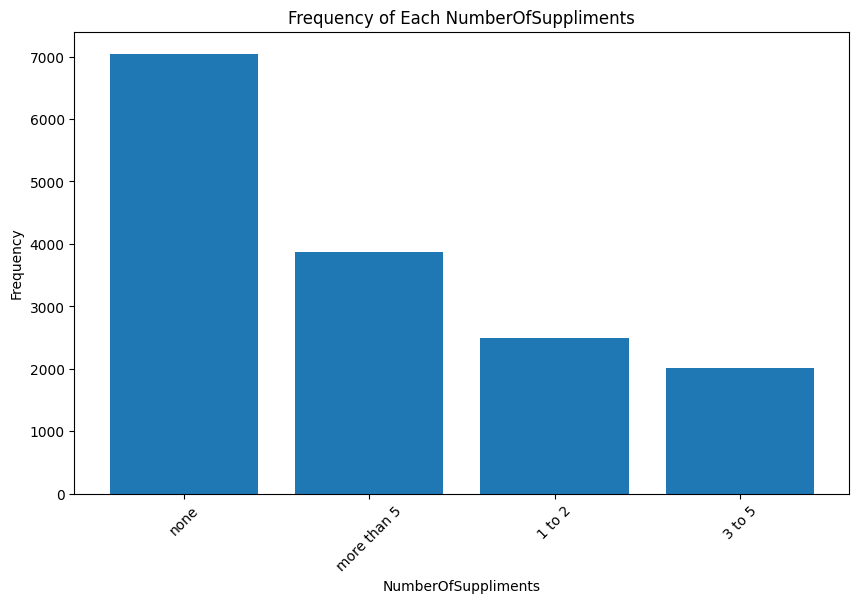

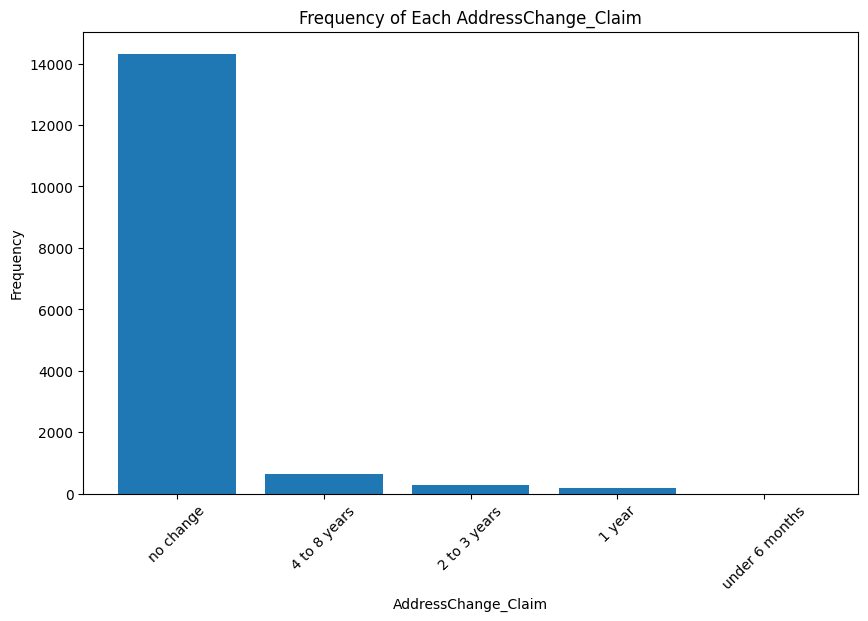

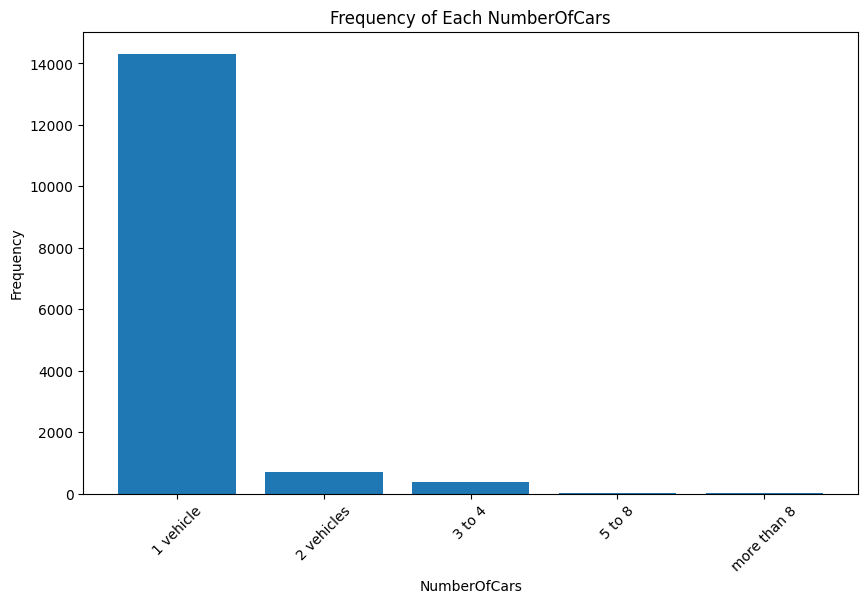

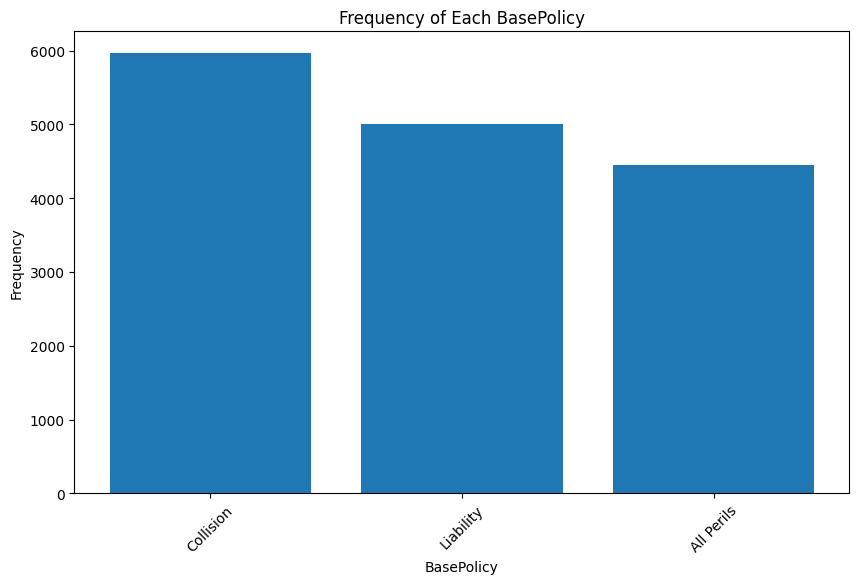

In [ ]:
for i in cat_cols:
    catFreq(df, i)

<h4>

**Observations**
- **Car Make**: Top 5 cars brand claiming are: Pontiac, Toyota, Honda, Mazda, Chevrolet
- **AccidentArea**: 90% of the accident are in Urban Areas
- **WeekdayClaims**: Claims are most likely to be made during Weekdays, especially Monday and Tuesday.
- **MonthClaimed**: January, May, March, and October see the highest number of Claims. Spring and Fall are more likely to have claims than other season.
- **Sex**: 85% of the claims are from Male
- **Marital Status**: Most claims are from Married and followed by Single status. Divorced and Widow are very rare.
- **Fault**: Policy Holders accounts for more claims than Third Party.
- **Policy Type**: Sedan-Collision and Sedan-Liability, and Sedan-AllPerils are top 3 for Claims
- **VehicleCategory**: Most accidents are involved with Sedan and Sport type.
- **Price**: Most cars's Price range from $20k - $29k

<h2> Bivariate Analysis <h2

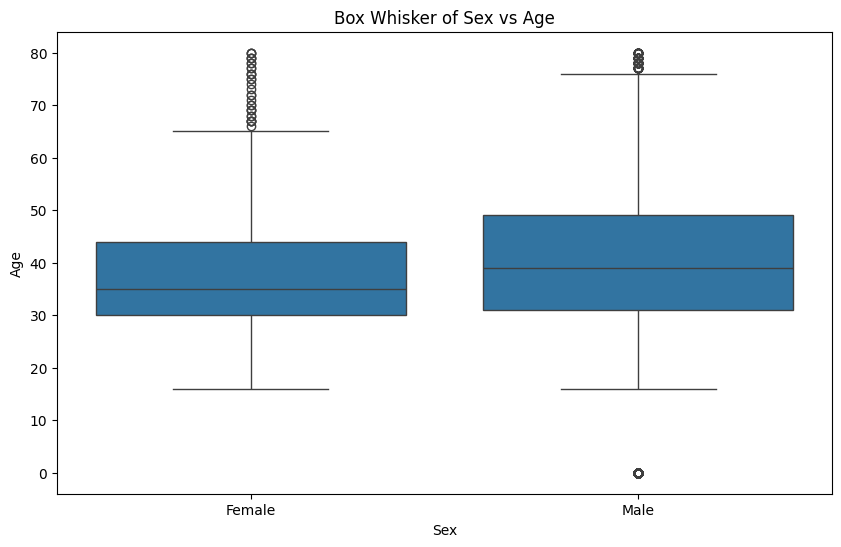

In [ ]:
# Box whisker of Sex vs Age
plt.figure(figsize=(10,6))
sns.boxplot(x='Sex', y='Age', data=df)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Box Whisker of Sex vs Age')
plt.show()
# Looking into Fault

**Observations**:
- Male's average Age are higher than that of Female. However, the Age range of Female are wider.

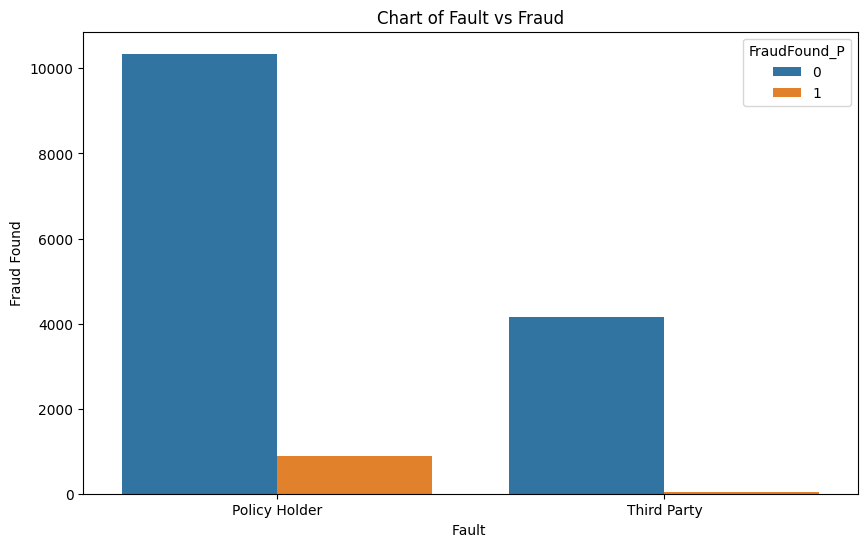

In [ ]:
# Box whisker of Fault vs Fraud
plt.figure(figsize=(10,6))
plt.xlabel('Fault ')
plt.ylabel('Fraud Found')
plt.title('Chart of Fault vs Fraud')
sns.countplot(x='Fault', hue ='FraudFound_P', data=df)
plt.show()
# Looking into Fault

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Fraud Frequency by Address Claim Change')
plt.xlabel('Address Claim Change')
plt.ylabel('Num of Fraud')
sns.countplot(x='AddressChange_Claim_', hue ='FraudFound_P', data=df)

In [ ]:
# Box whisker of Marital Status vs Fraud
plt.figure(figsize=(10,6))
sns.boxplot(x='AddressChange_Claim_', y='Fault', data=df)
plt.xlabel('Fraud Found')
plt.ylabel('Fault')
plt.title('Box Whisker of Fault vs Fraud')
plt.show()

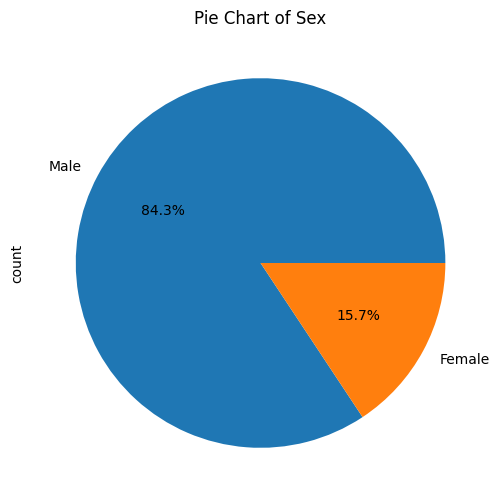

In [ ]:
# Pie chart of Sex and remove the 'count'
plt.figure(figsize=(10,6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Sex')
plt.show()

<Axes: xlabel='AccidentArea', ylabel='count'>

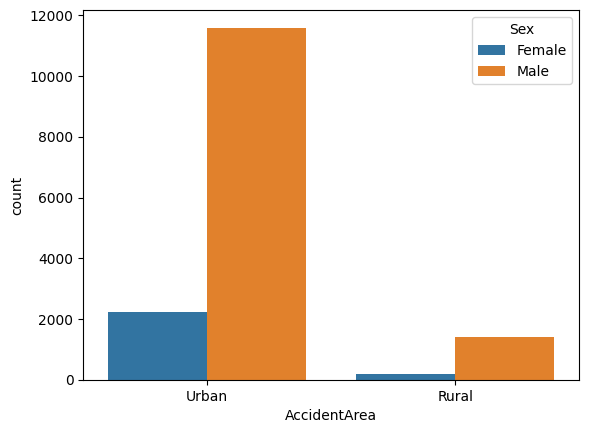

In [ ]:
sns.countplot(x='AccidentArea', hue='Sex',data=df)


In [ ]:
df.head(5)

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year BasePolicy  
0                 none               1 year        3 to 4  1994  Liability  
1                 none            no change     1 vehicle  1994  Collision  
2                 none            no change     1 vehicle  1994  Collision  
3          more than 5            no change     1 vehicle  1994  Liability  
4                 none            no change     1 vehicle  1994  Collision  

[5 rows x 32 columns]

<h3> More into 'FraudFound_P'

<Axes: xlabel='FraudFound_P', ylabel='count'>

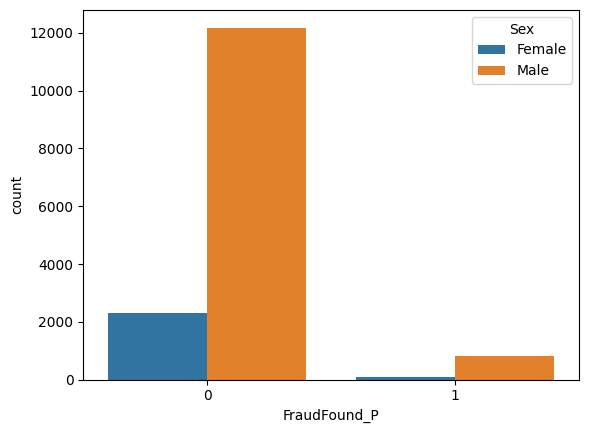

In [ ]:
# Bivariate Anlaysis with "FraduFound_P"
sns.countplot(x='FraudFound_P', hue = 'Sex', data=df)

<Axes: xlabel='FraudFound_P', ylabel='Age'>

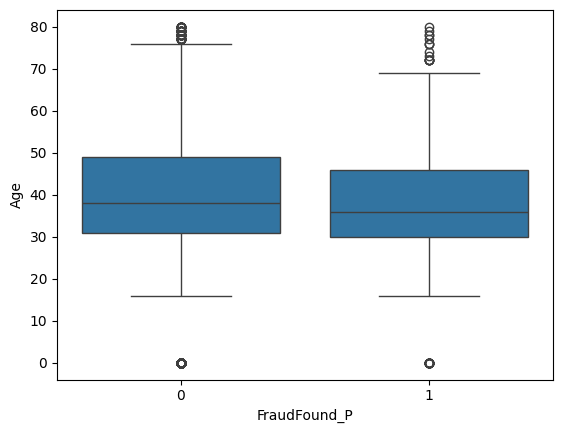

In [ ]:
sns.boxplot(x='FraudFound_P', y='Age', data=df)

<Axes: title={'center': 'Fraud Frequency by Age of Vehicle'}, xlabel='Age of Car', ylabel='Num of Fraud'>

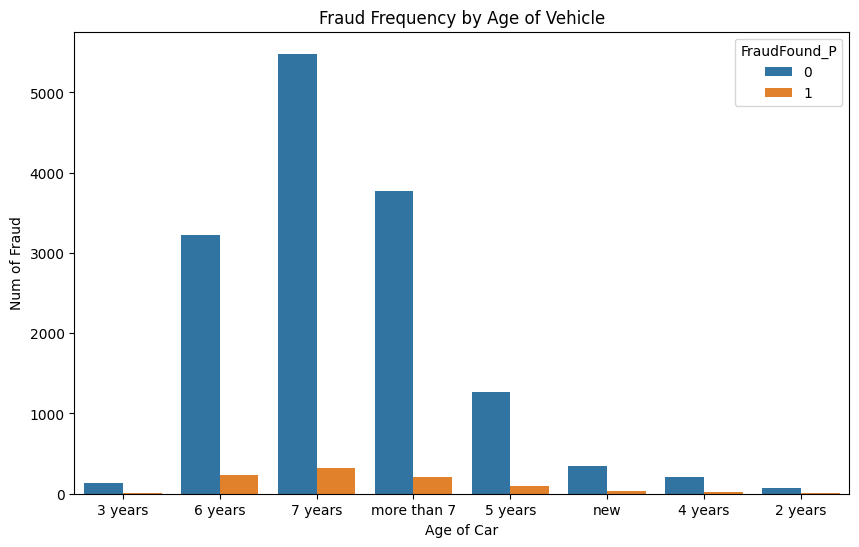

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Fraud Frequency by Age of Vehicle')
plt.xlabel('Age of Car')
plt.ylabel('Num of Fraud')
sns.countplot(x='AgeOfVehicle', hue ='FraudFound_P', data=df)

**Observations**:
- Vehicles with 6 years or above old will be more likely to found as Fraud since people probably tend to make a benefits out of their policy.

In [ ]:
# @title driverRating and Fraudfound and sort by fraud1s
table = pd.crosstab(df['DriverRating'], df['FraudFound_P'])
table = table.sort_values(by=1, ascending=False)
table

FraudFound_P     0    1
DriverRating           
3             3642  242
4             3556  235
1             3712  232
2             3587  214

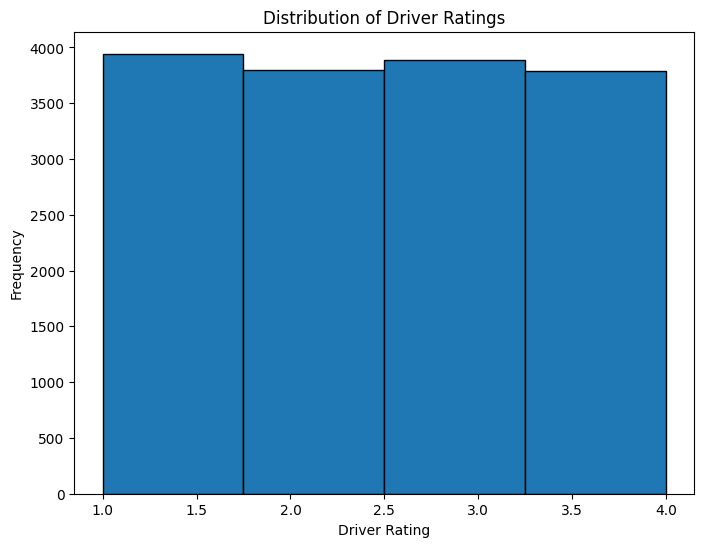

In [ ]:
# @title Distribution of Driver Ratings

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['DriverRating'], bins=4, edgecolor='black')
plt.title('Distribution of Driver Ratings')
plt.xlabel('Driver Rating')
_ = plt.ylabel('Frequency')

<h3> Fraud and Other Categorical Columns Frequency Plots

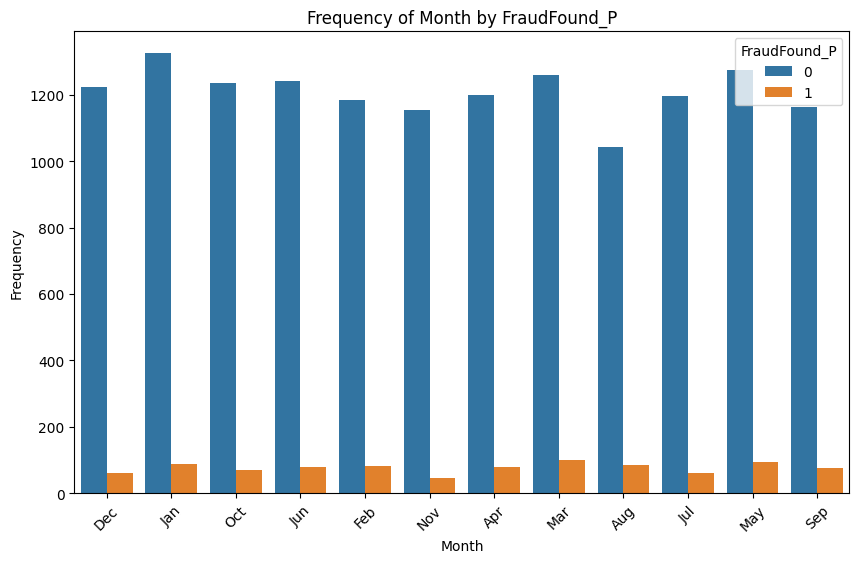

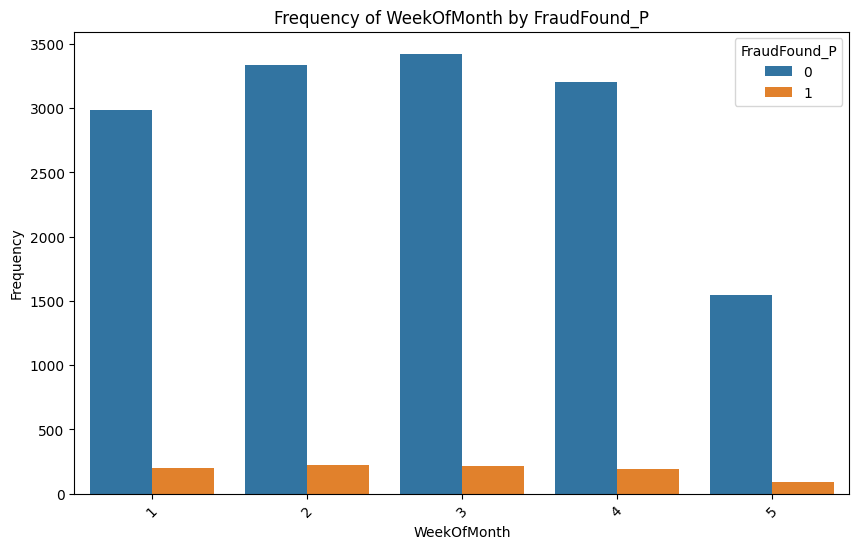

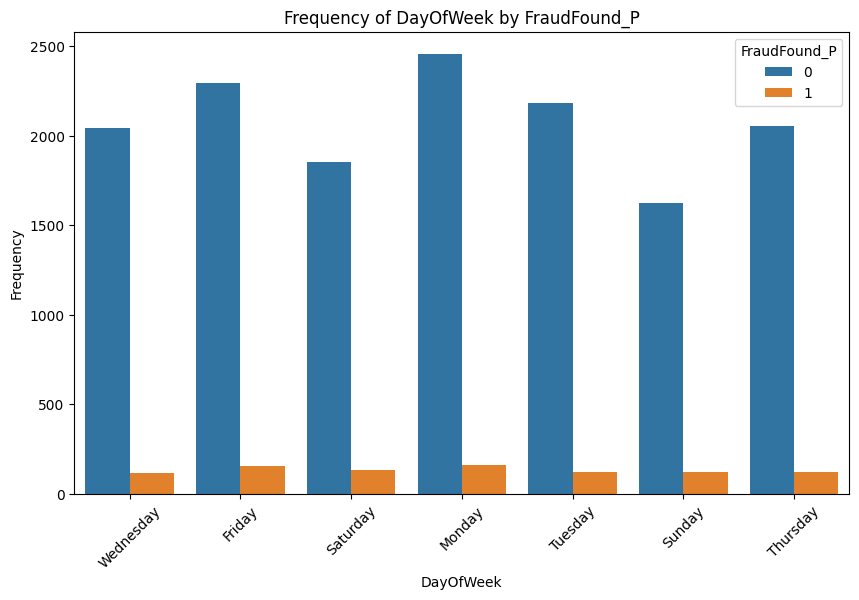

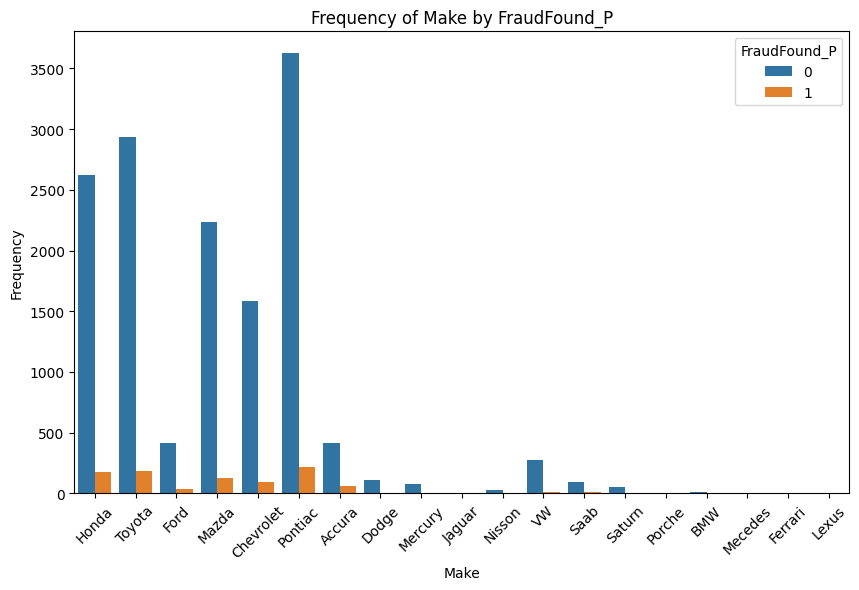

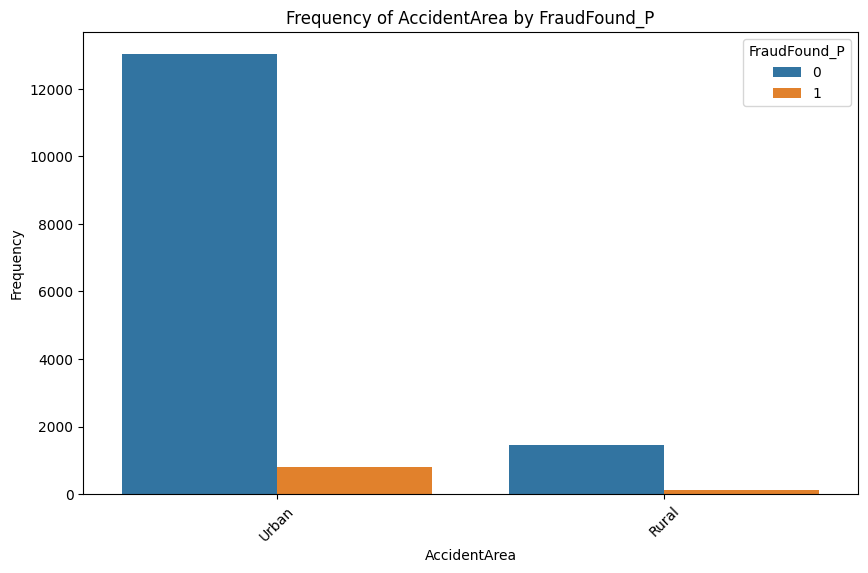

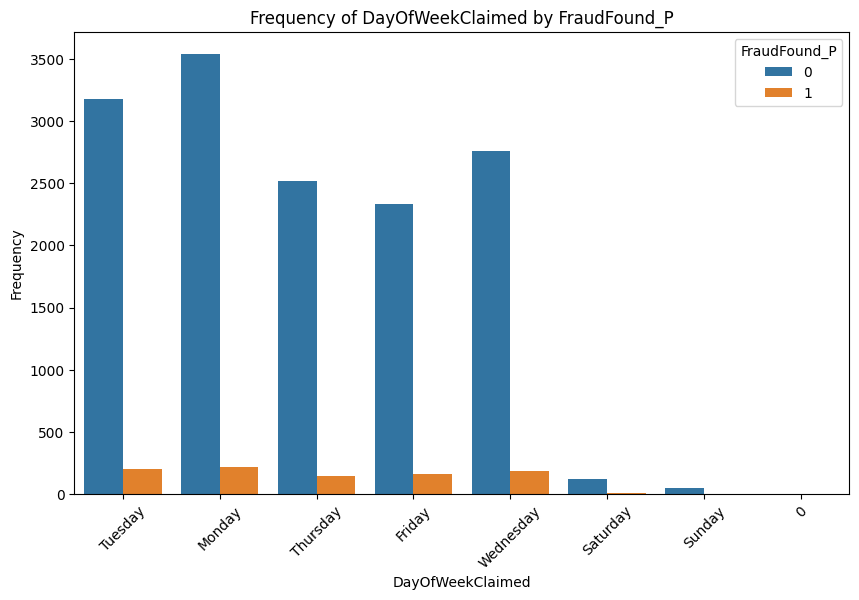

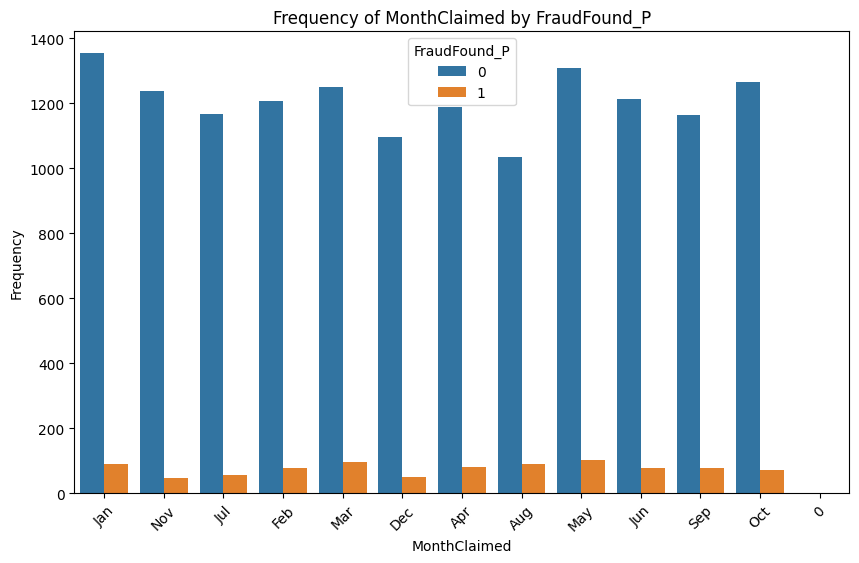

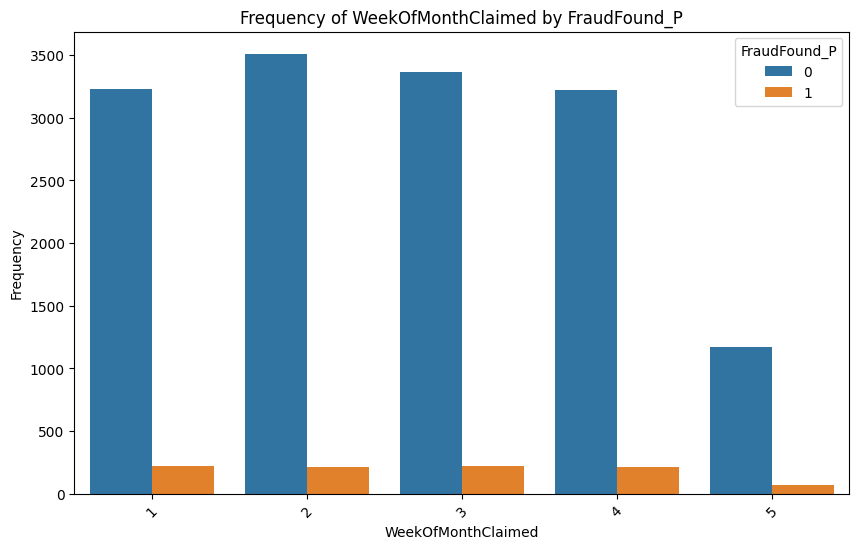

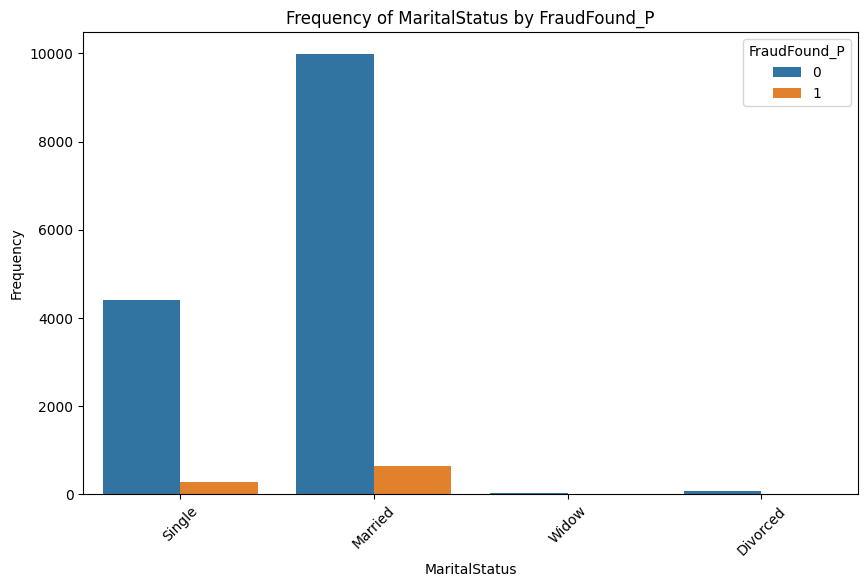

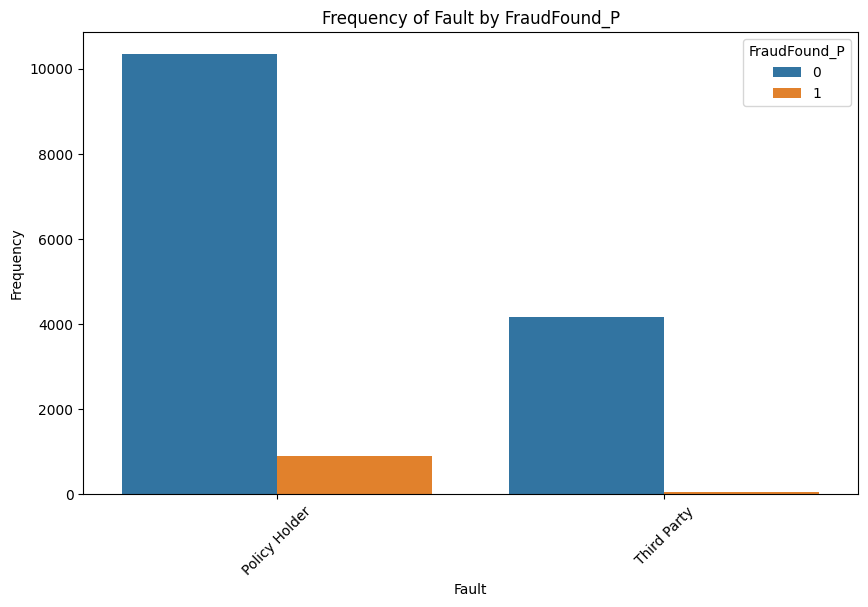

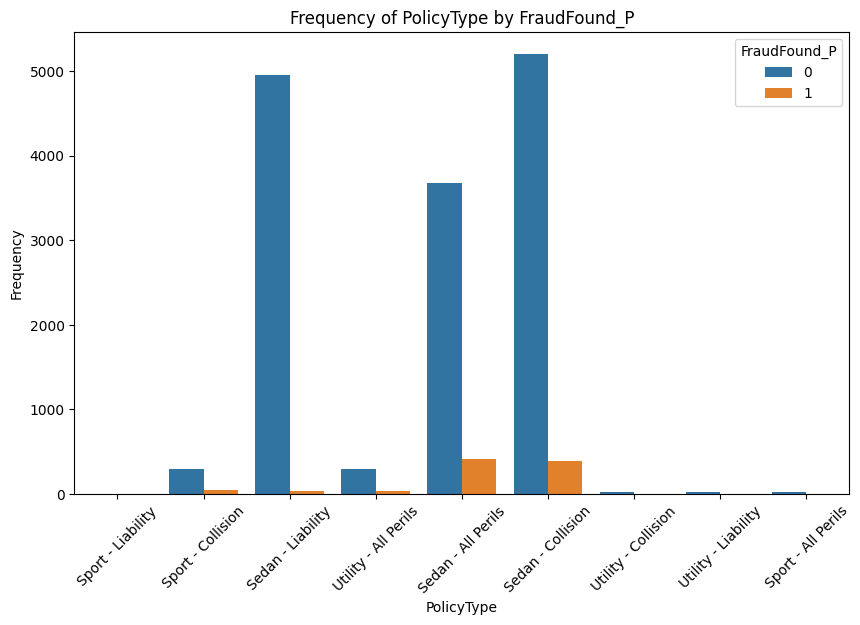

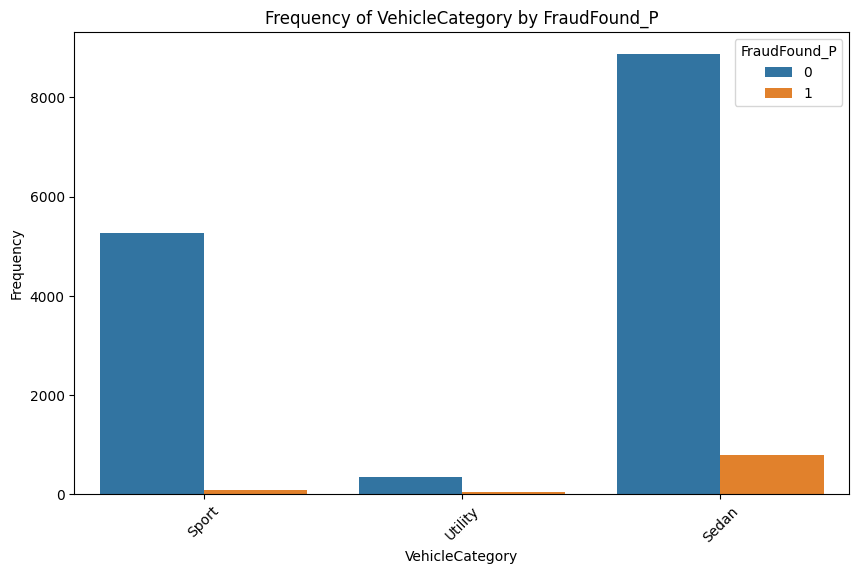

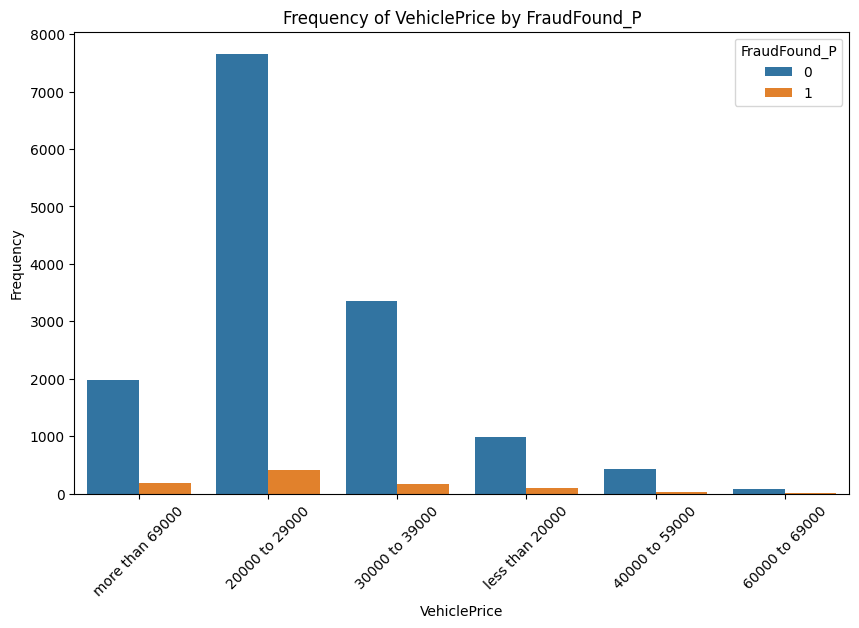

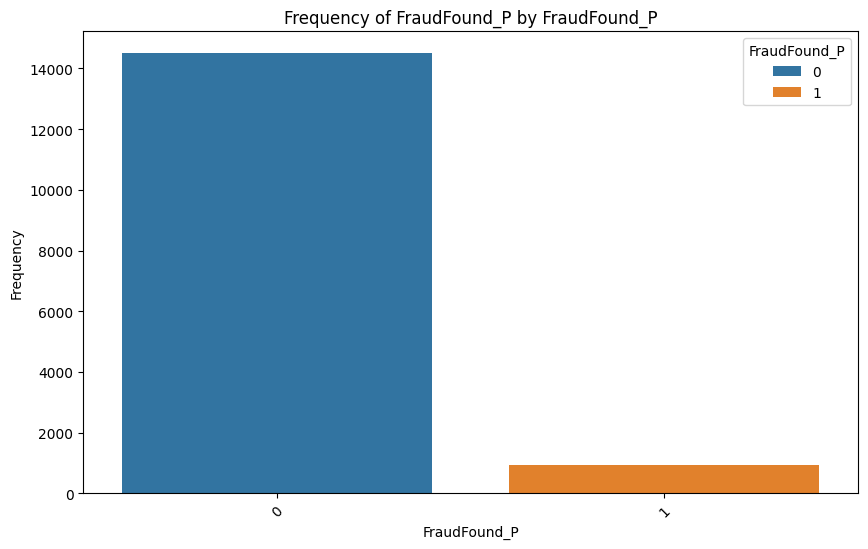

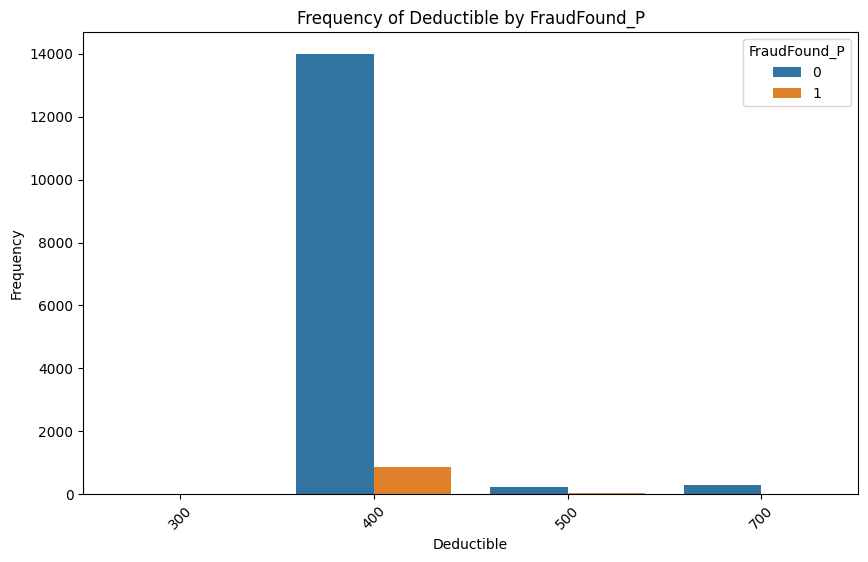

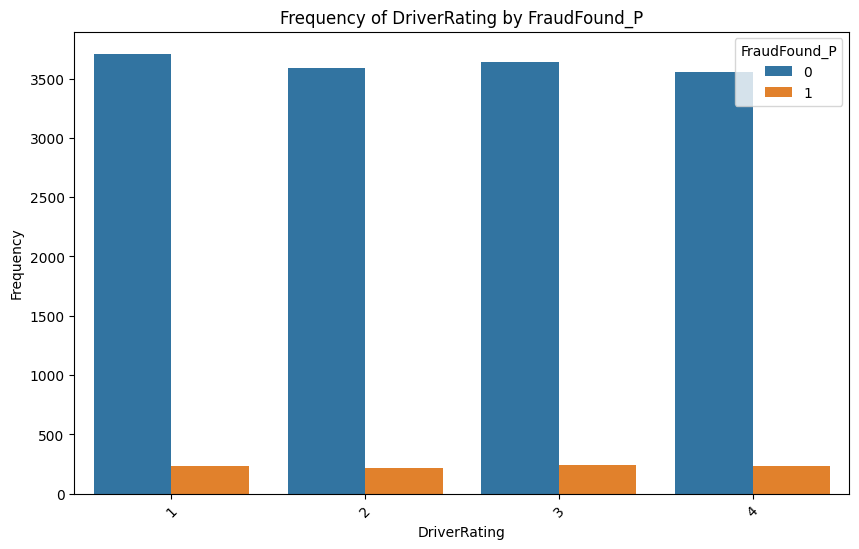

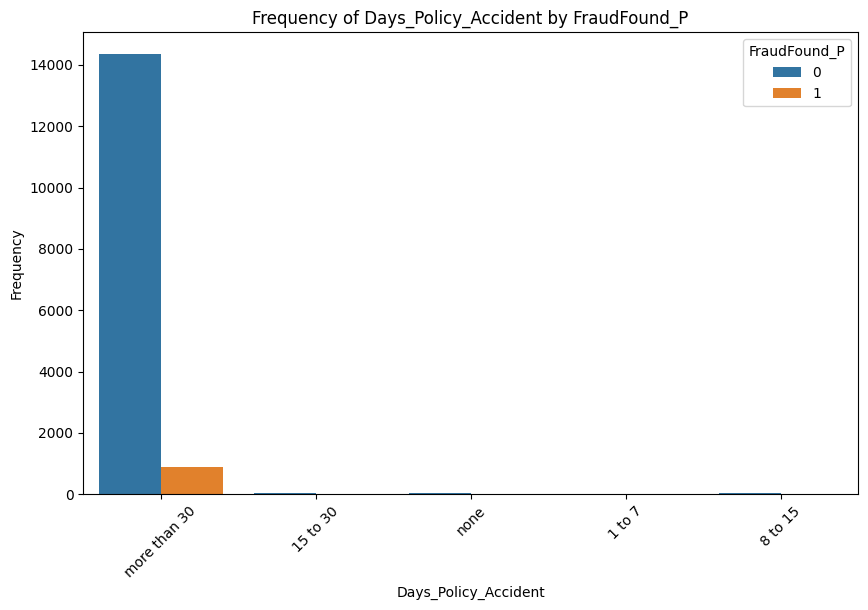

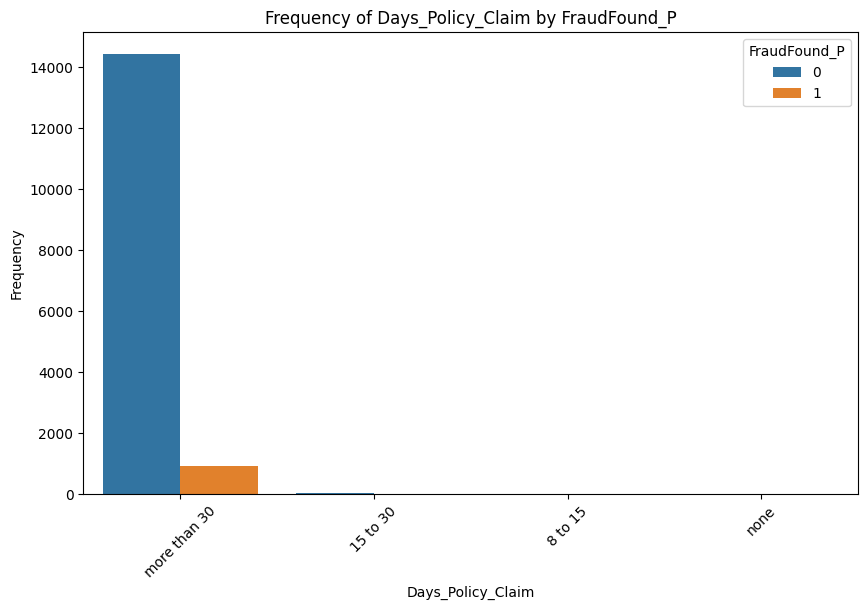

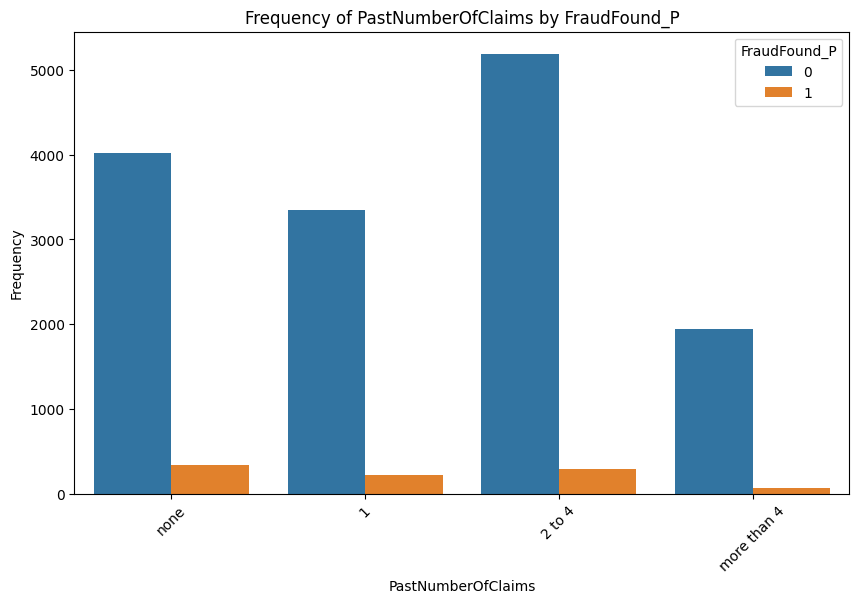

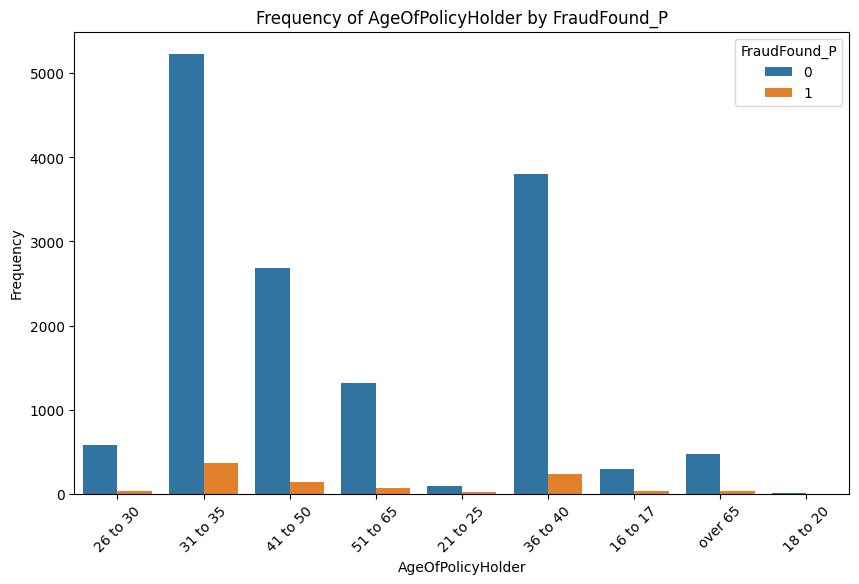

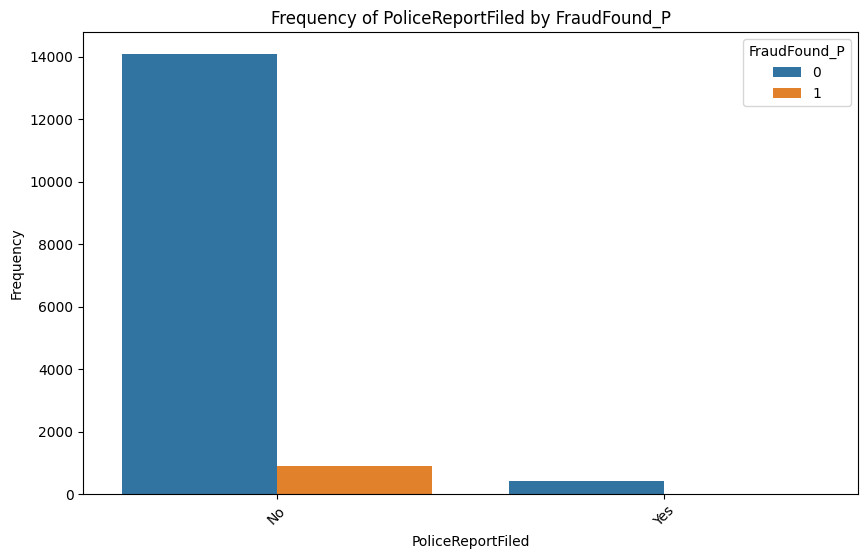

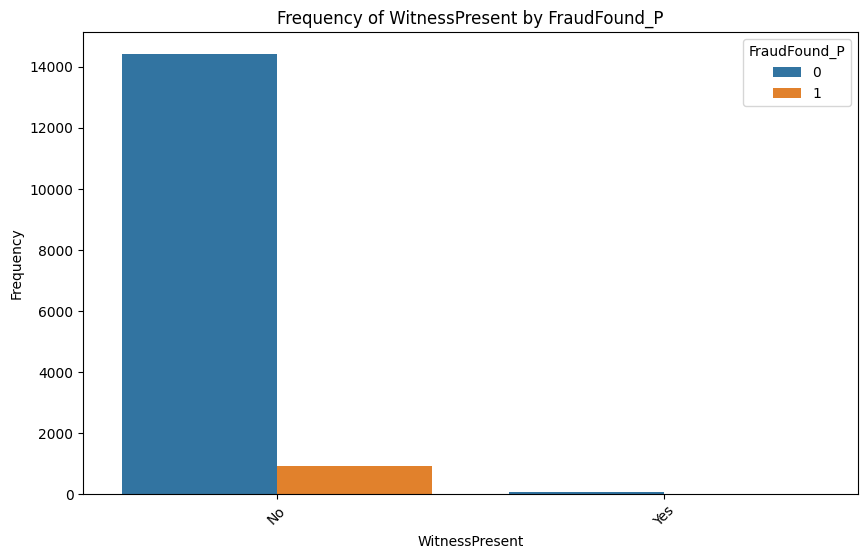

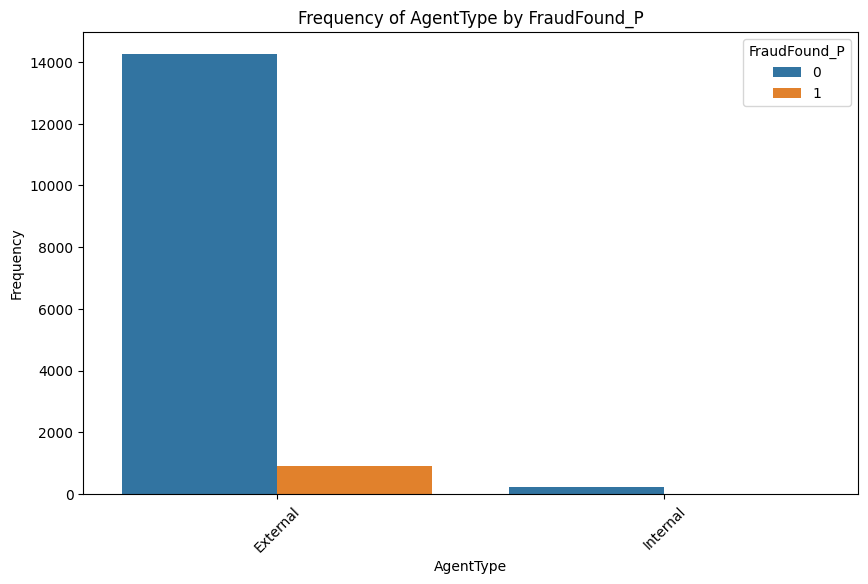

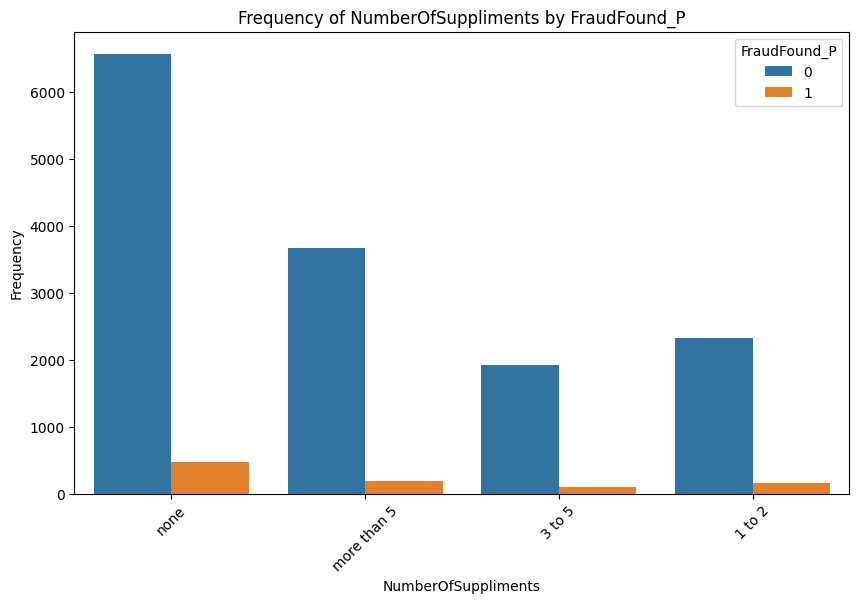

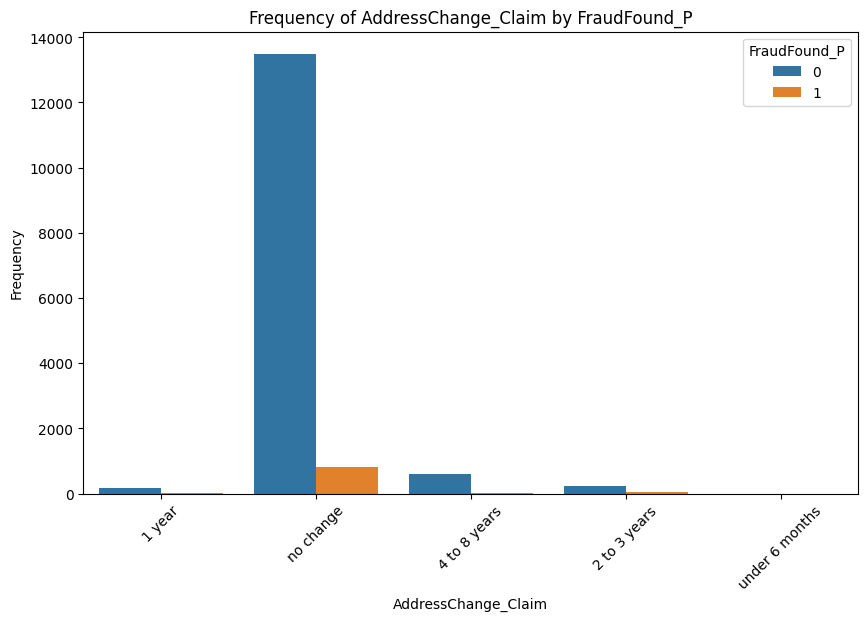

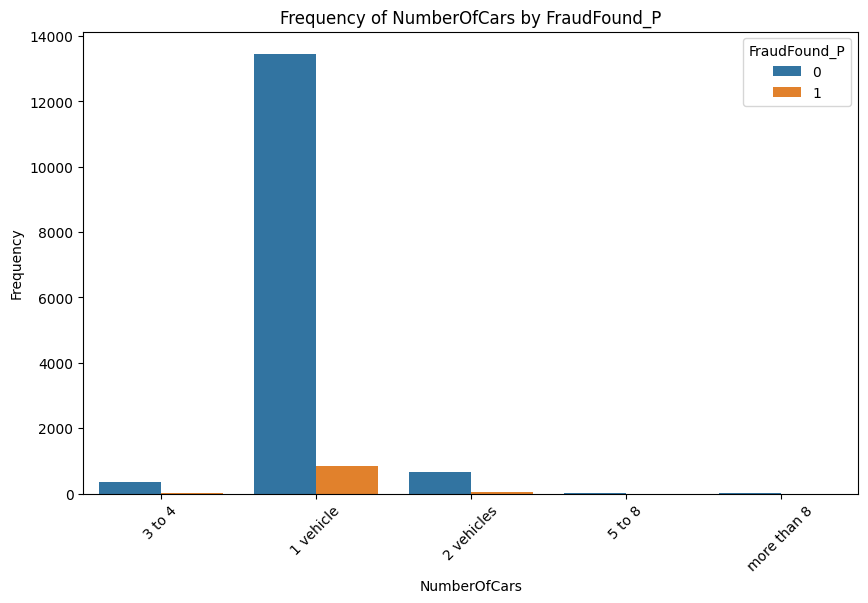

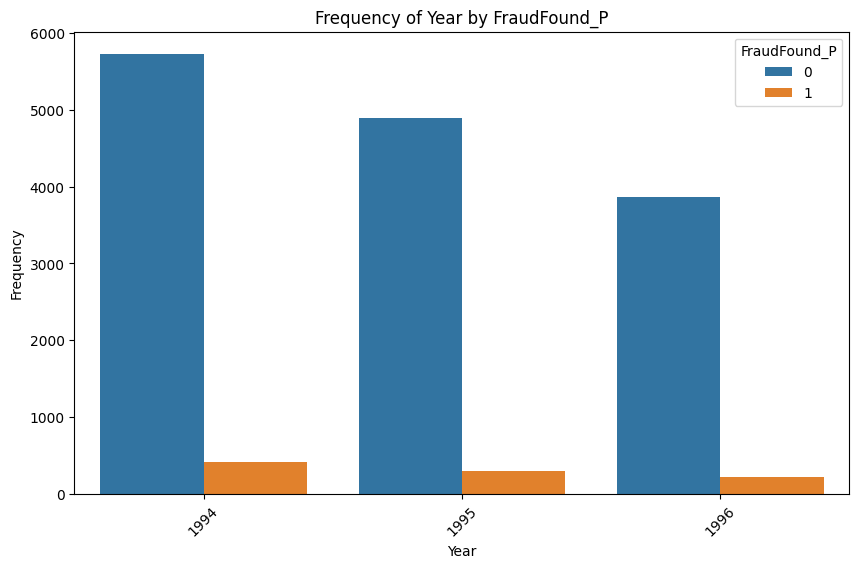

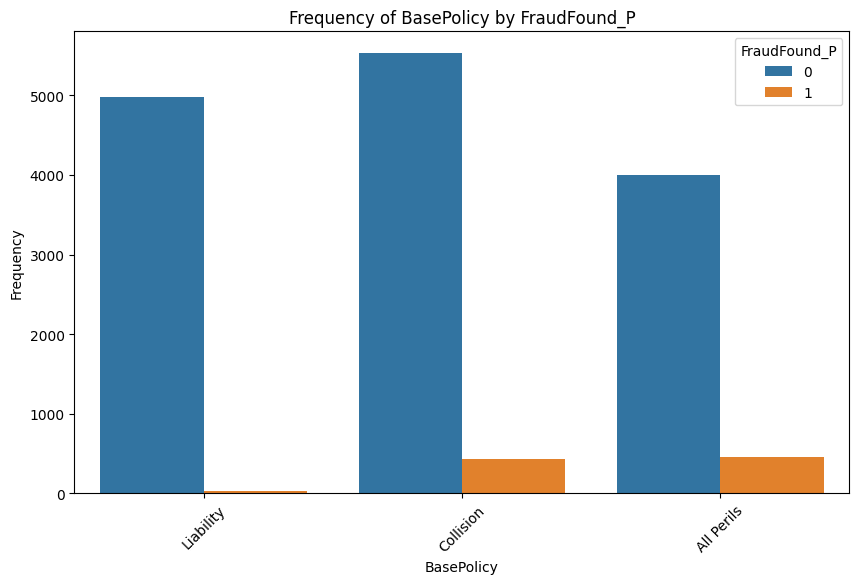

In [ ]:
# categorical_remain with all columns except Age, PolicyNumber, RepNumber, Sex, AgeOfVehicle
excluded_columns = ["Age", "PolicyNumber", "RepNumber", "Sex", "AgeOfVehicle"]
categorical_remain = [col for col in df.columns if col not in excluded_columns]

# count plot for each with FraudFound_P and hue for others categorical columns
for col in categorical_remain:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='FraudFound_P', data=df)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {col} by FraudFound_P')
    plt.show()

# add the number of counts on each graphs


**Obervations**:
- Claims are typically filed a lot around **January** and **March** (which is start of the year).
- Majority of claims were made with **Chevy**, followed by **Toyota and Honda**. Fraudulant claims are found highly in **Pontiac, Toyota, and Honda**.
- Most Fraudulent claims happends in **Urban Area**.
- Marital Status shows a high Fraud in **Married couples** (seems like easier with a partner who support the Fraud).
- **Policy Holder** is the main cause of Fraudulant claims.
- Fraudulent usually belongs to **Sedan-All Perils and Sedan-Collisions** policy type and **Car's Price** ranging from **20k - 29k**
- People with **Age 31-35 and 36-40** have high chance of file a Fraudulent claim.
- Fraud Claims **never report to the Police**.
- either the Fraud Claim has **No Suppliments** or **More than 5 suppliments**. They also usally **only have 1 vehicle**.

<h1> 5. Correlations

In [ ]:
df=df.drop(['Month', 'DayOfWeek'], axis=1) #drop columns

In [ ]:
df.head()

WeekOfMonth    Make AccidentArea DayOfWeekClaimed MonthClaimed  \
0            5   Honda        Urban          Tuesday          Jan   
1            3   Honda        Urban           Monday          Jan   
2            5   Honda        Urban         Thursday          Nov   
3            2  Toyota        Rural           Friday          Jul   
4            5   Honda        Urban          Tuesday          Feb   

   WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  ...  \
0                   1  Female        Single   21  Policy Holder  ...   
1                   4    Male        Single   34  Policy Holder  ...   
2                   2    Male       Married   47  Policy Holder  ...   
3                   1    Male       Married   65    Third Party  ...   
4                   2  Female        Single   27    Third Party  ...   

  AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0      3 years          26 to 30                No              No   External   
1      6 years          31 to 35               Yes              No   External   
2      7 years          41 to 50                No              No   External   
3  more than 7          51 to 65               Yes              No   External   
4      5 years          31 to 35                No              No   External   

   NumberOfSuppliments  AddressChange_Claim NumberOfCars  Year BasePolicy  
0                 none               1 year       3 to 4  1994  Liability  
1                 none            no change    1 vehicle  1994  Collision  
2                 none            no change    1 vehicle  1994  Collision  
3          more than 5            no change    1 vehicle  1994  Liability  
4                 none            no change    1 vehicle  1994  Collision  

[5 rows x 30 columns]

Feature Engineering for Binary columns and Get Dummies

In [ ]:
# Turn rest of categorical variables into binary
df_AccidentArea={'Urban': 1, 'Rural':0}
df_Sex={'Male': 1, 'Female':0}
df_Fault={'Policy Holder': 1, 'Third Party':0}
df_PoliceReportFiled={'Yes': 1, 'No':0}
df_WitnessPresent={'Yes': 1, 'No':0}
df_AgentType={'External': 1, 'Internal':0}

df_VehiclePrice={'more than 69000': 6, '20000 to 29000': 2, '30000 to 39000': 3,
       'less than 20000': 1, '40000 to 59000': 4, '60000 to 69000': 5}

df_NumberOfSuppliments={'none': 1, 'more than 5': 4, '3 to 5': 3, '1 to 2': 2}

df['AccidentArea'] = df['AccidentArea'].map(df_AccidentArea)
df['Sex'] = df['Sex'].map(df_Sex)
df['Fault'] = df['Fault'].map(df_Fault)
df['PoliceReportFiled'] = df['PoliceReportFiled'].map(df_PoliceReportFiled)
df['WitnessPresent'] = df['WitnessPresent'].map(df_WitnessPresent)
df['AgentType'] = df['AgentType'].map(df_AgentType)
df['VehiclePrice'] = df['VehiclePrice'].map(df_VehiclePrice)
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(df_NumberOfSuppliments)



# Get dummies of categorical variables that aren't ordinal
cat_cols_dummies=['Make','MaritalStatus','PolicyType', 'VehicleCategory','Days_Policy_Accident', 'Days_Policy_Claim','PastNumberOfClaims', 'AddressChange_Claim','NumberOfCars','BasePolicy']

df=pd.get_dummies(data=df, columns=cat_cols_dummies, drop_first=True)

df.head()

Month  WeekOfMonth  DayOfWeek  AccidentArea DayOfWeekClaimed MonthClaimed  \
0   Dec            5  Wednesday             1          Tuesday          Jan   
1   Jan            3  Wednesday             1           Monday          Jan   
2   Oct            5     Friday             1         Thursday          Nov   
3   Jun            2   Saturday             0           Friday          Jul   
4   Jan            5     Monday             1          Tuesday          Feb   

   WeekOfMonthClaimed  Sex  Age  Fault  ...  AddressChange_Claim_2 to 3 years  \
0                   1    0   21      1  ...                             False   
1                   4    1   34      1  ...                             False   
2                   2    1   47      1  ...                             False   
3                   1    1   65      0  ...                             False   
4                   2    0   27      0  ...                             False   

   AddressChange_Claim_4 to 8 years  AddressChange_Claim_no change  \
0                             False                          False   
1                             False                           True   
2                             False                           True   
3                             False                           True   
4                             False                           True   

   AddressChange_Claim_under 6 months  NumberOfCars_2 vehicles  \
0                               False                    False   
1                               False                    False   
2                               False                    False   
3                               False                    False   
4                               False                    False   

  NumberOfCars_3 to 4 NumberOfCars_5 to 8  NumberOfCars_more than 8  \
0                True               False                     False   
1               False               False                     False   
2               False               False                     False   
3               False               False                     False   
4               False               False                     False   

   BasePolicy_Collision  BasePolicy_Liability  
0                 False                  True  
1                  True                 False  
2                  True                 False  
3                 False                  True  
4                  True                 False  

[5 rows x 73 columns]

In [ ]:
print(df.dtypes)

WeekOfMonth                  int64
AccidentArea                 int64
DayOfWeekClaimed            object
MonthClaimed                object
WeekOfMonthClaimed           int64
                             ...  
NumberOfCars_3 to 4           bool
NumberOfCars_5 to 8           bool
NumberOfCars_more than 8      bool
BasePolicy_Collision          bool
BasePolicy_Liability          bool
Length: 71, dtype: object


In [ ]:
df_numeric = df.select_dtypes(include=['int64','bool','uint8','float64'])

In [ ]:
# df_cat = df.drop(["WeekOfMonth", "WeekOfMonthClaimed", "Age", "RepNumber", "Deductible", "DriverRating", "Year"], axis=1) #drop columns

In [ ]:
df_numeric.head()

WeekOfMonth  AccidentArea  WeekOfMonthClaimed  Sex  Age  Fault  \
0            5             1                   1    0   21      1   
1            3             1                   4    1   34      1   
2            5             1                   2    1   47      1   
3            2             0                   1    1   65      0   
4            5             1                   2    0   27      0   

   VehiclePrice  FraudFound_P  RepNumber  Deductible  ...  \
0             6             0         12         300  ...   
1             6             0         15         400  ...   
2             6             0          7         400  ...   
3             2             0          4         400  ...   
4             6             0          3         400  ...   

   AddressChange_Claim_2 to 3 years  AddressChange_Claim_4 to 8 years  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   AddressChange_Claim_no change  AddressChange_Claim_under 6 months  \
0                          False                               False   
1                           True                               False   
2                           True                               False   
3                           True                               False   
4                           True                               False   

   NumberOfCars_2 vehicles  NumberOfCars_3 to 4  NumberOfCars_5 to 8  \
0                    False                 True                False   
1                    False                False                False   
2                    False                False                False   
3                    False                False                False   
4                    False                False                False   

   NumberOfCars_more than 8  BasePolicy_Collision  BasePolicy_Liability  
0                     False                 False                  True  
1                     False                  True                 False  
2                     False                  True                 False  
3                     False                 False                  True  
4                     False                  True                 False  

[5 rows x 67 columns]

In [ ]:
print(df_numeric.dtypes)

WeekOfMonth                 int64
AccidentArea                int64
WeekOfMonthClaimed          int64
Sex                         int64
Age                         int64
                            ...  
NumberOfCars_3 to 4          bool
NumberOfCars_5 to 8          bool
NumberOfCars_more than 8     bool
BasePolicy_Collision         bool
BasePolicy_Liability         bool
Length: 67, dtype: object


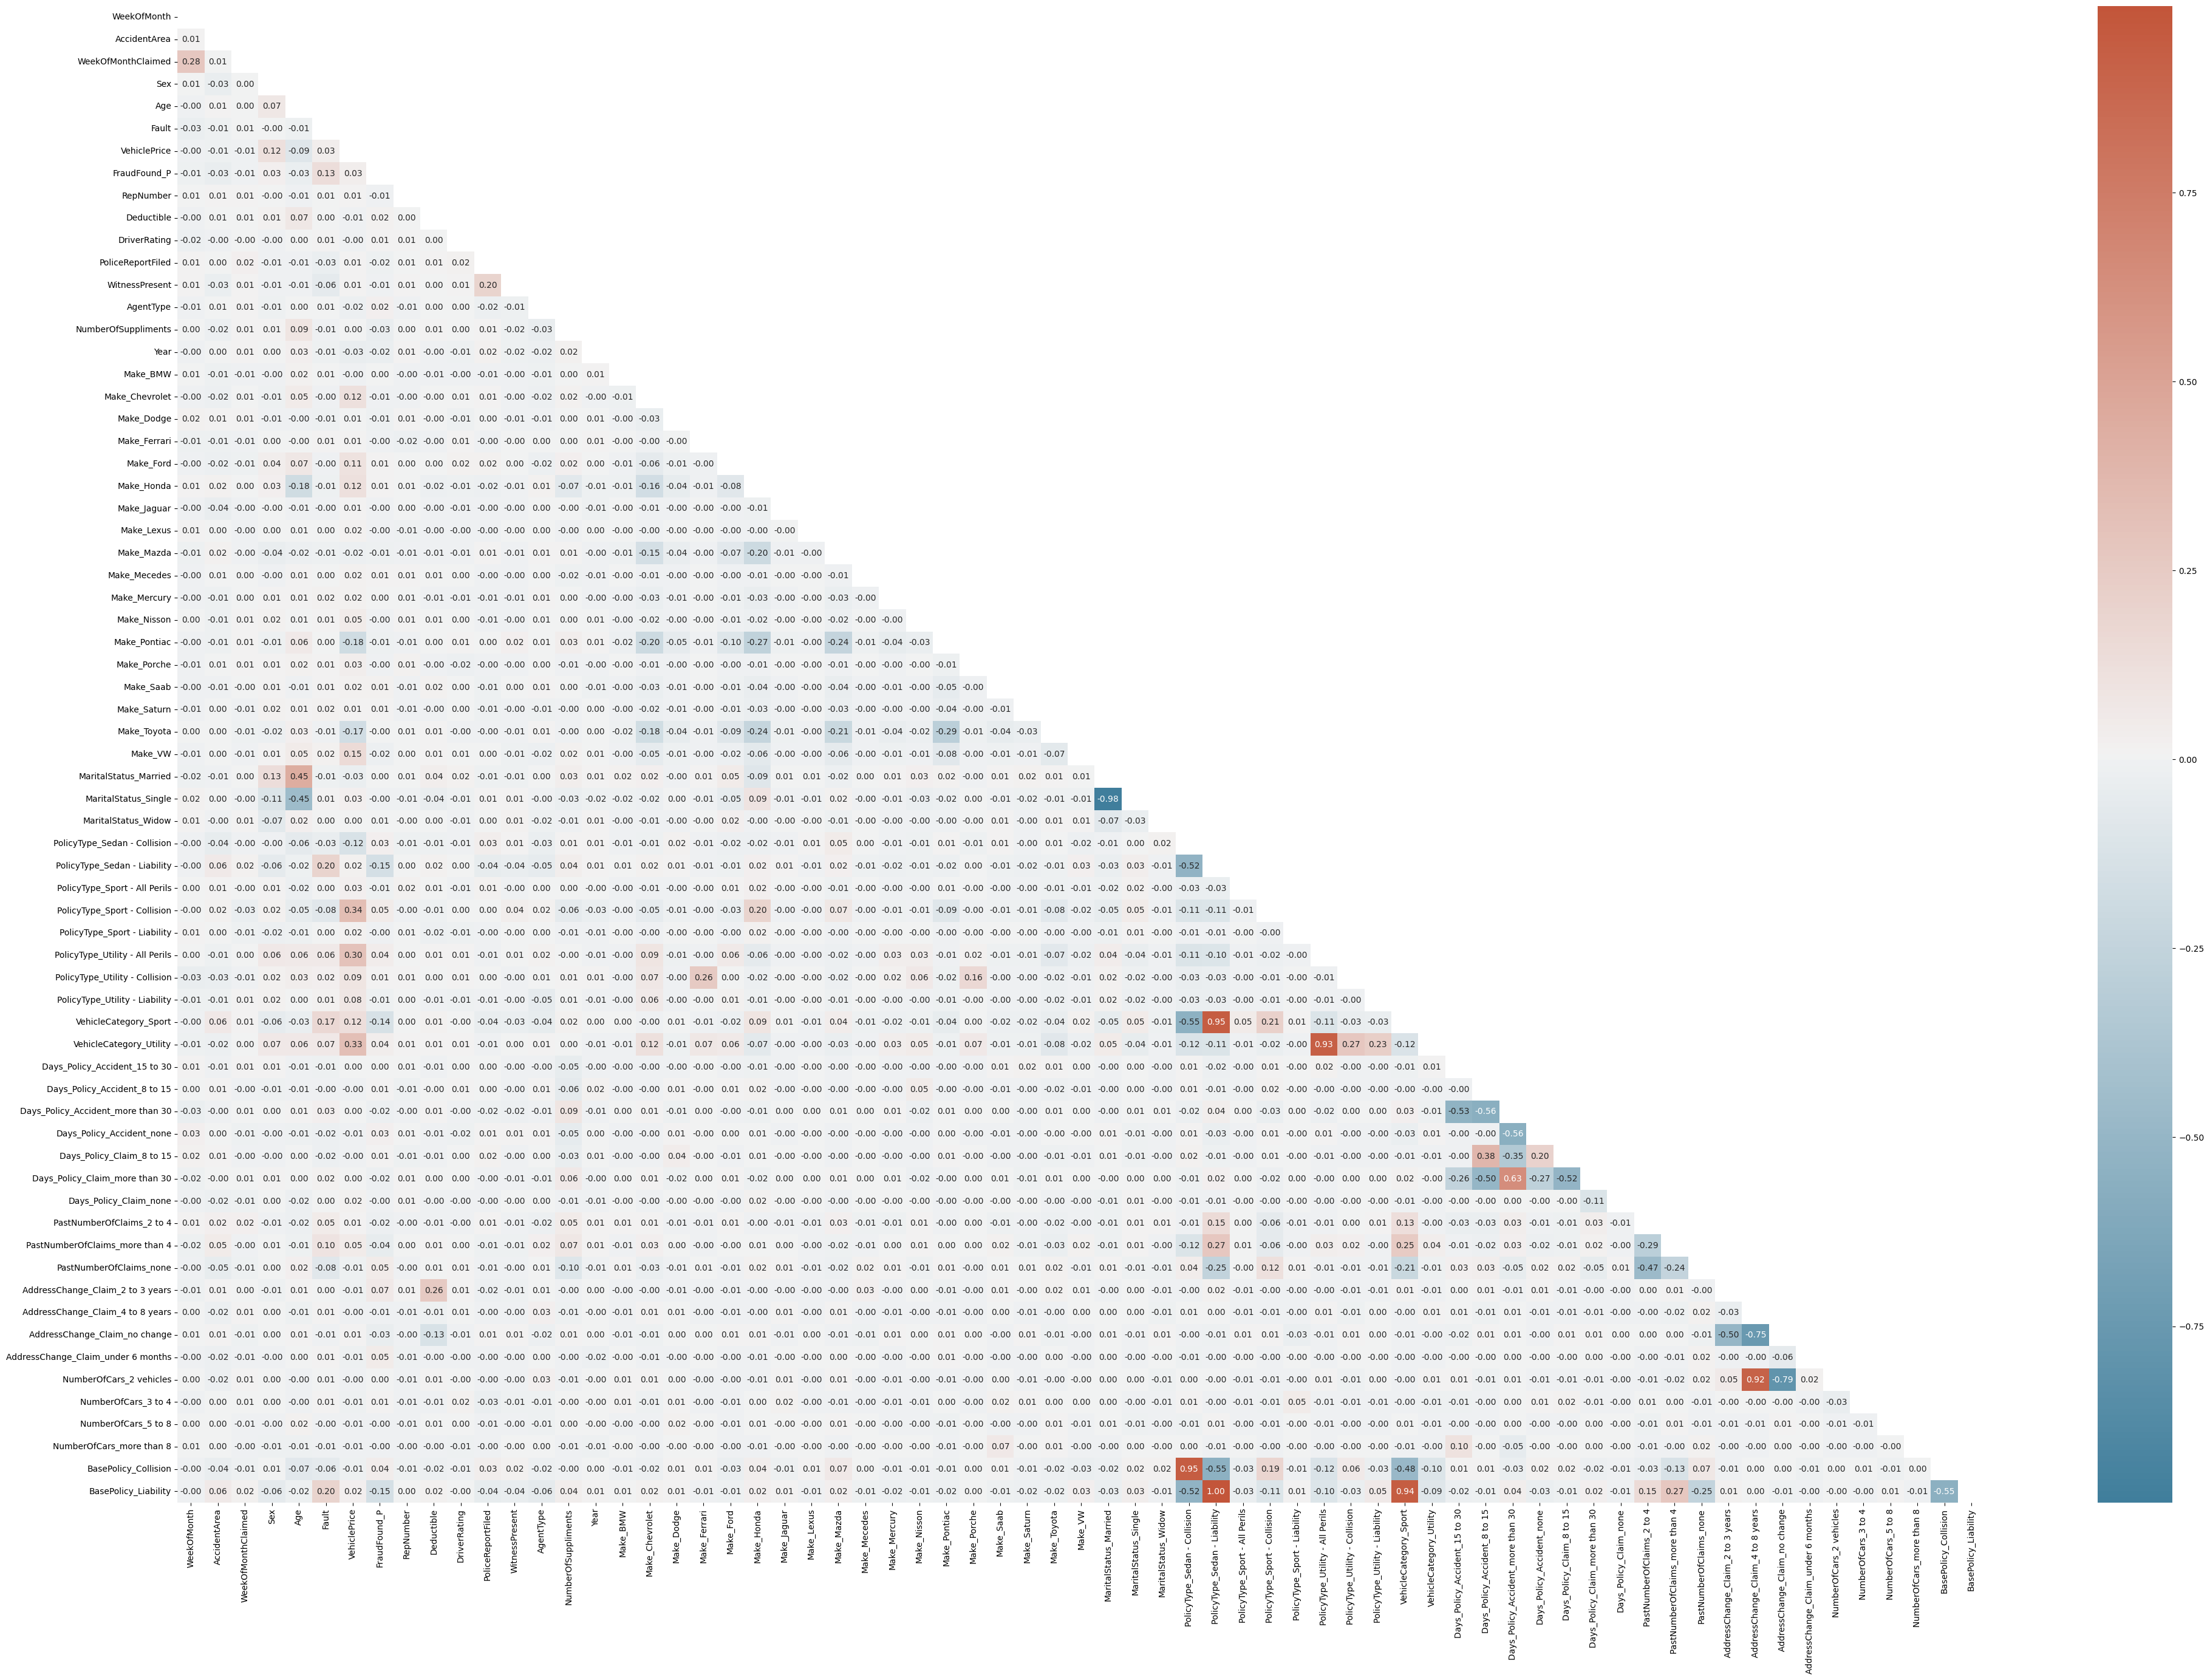

In [ ]:
plt.figure(figsize=(48,32))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = df_numeric.corr()
# Getting the Upper Triangle of the co-relation matrix
#matrix = np.triu(df.corr())
matrix = np.triu(np.ones_like(corr, dtype=bool))
# Create a visual view of the pairwise correlations
sns.heatmap(corr,annot=True,fmt='.2f',cmap=cmap, mask=matrix)

plt.show()

**Observations**:
- Seems like all our variables are not correlated at all, which is a good thing since we want to avoid correlations when building our model.

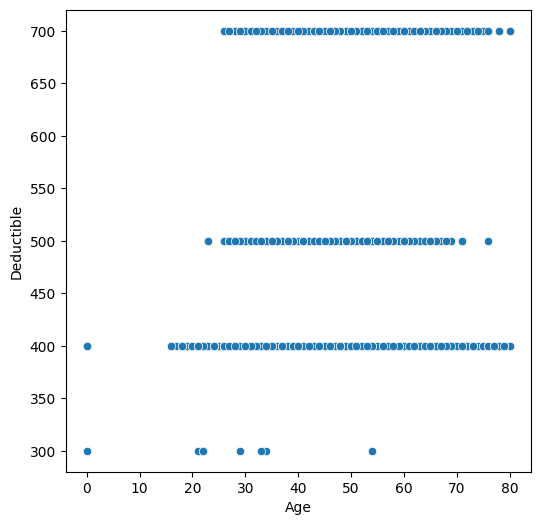

In [ ]:
# creating a scatterplot for Age and Deductible
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Age', y='Deductible')
plt.show()

## 6. Remove Variables/Outliers

- There is no outstanding outlier in our dataset, 90% of features are categorical.

## 7. Split the data

In [ ]:
X = df_numeric.drop("FraudFound_P", axis=1).values
y = df_numeric["FraudFound_P"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## 8. SCALE Dataset and apply SMOTE on Training

In [ ]:
sc = StandardScaler() # imported with the libraries, we give it an alias here

# Fit the scaler only on the training set
X_train = sc.fit_transform(X_train)

# Transform the test set using the scaler fitted on training set
X_test = sc.transform(X_test)

In [ ]:
# Apply SMOTE on the scaled training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
labels = Counter(y_train)
print("y labels after oversampling:", labels)

y labels after oversampling: Counter({0: 11598, 1: 11598})


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(X, cols): # Add cols argument to receive feature names
    vif = pd.DataFrame()
    vif["feature"] = cols # Use provided feature names

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(X, i) for i in range(len(cols))
    ]
    return vif

# Get feature names before scaling
cols = df_numeric.drop("FraudFound_P", axis=1).columns

print(checking_vif(X_train, cols)) # Pass cols with X_train to checking_vif function

                     feature       VIF
0                WeekOfMonth  1.079300
1               AccidentArea  1.030225
2         WeekOfMonthClaimed  1.082347
3                        Sex  1.079258
4                        Age  1.460407
..                       ...       ...
61       NumberOfCars_3 to 4  1.036369
62       NumberOfCars_5 to 8  1.002856
63  NumberOfCars_more than 8  1.011693
64      BasePolicy_Collision       inf
65      BasePolicy_Liability       inf

[66 rows x 2 columns]


## 9. Building Models

### **Logistic Regression**

### Examine the Shape

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(23196, 66)
(3084, 66)
(23196,)
(3084,)


In [ ]:
lg = LogisticRegression(random_state = 42, class_weight='balanced')

# fitting model on Training data
lg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

###  Checking Model Performance

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.89      0.62      0.73     11598
           1       0.71      0.92      0.80     11598

    accuracy                           0.77     23196
   macro avg       0.80      0.77      0.77     23196
weighted avg       0.80      0.77      0.77     23196



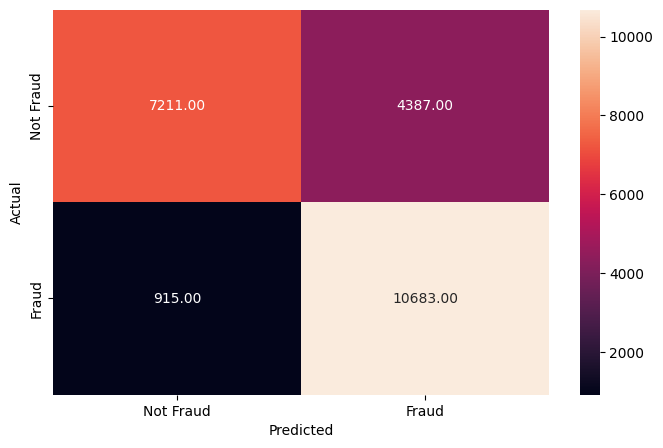

Training Accuracy:  0.7714261079496465


In [ ]:
# predicting on training data
y_pred_train = lg.predict(X_train)

# check performance on training data
metrics_score(y_train, y_pred_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training Accuracy: ', train_accuracy)

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2899
           1       0.13      0.90      0.23       185

    accuracy                           0.64      3084
   macro avg       0.56      0.76      0.50      3084
weighted avg       0.94      0.64      0.73      3084



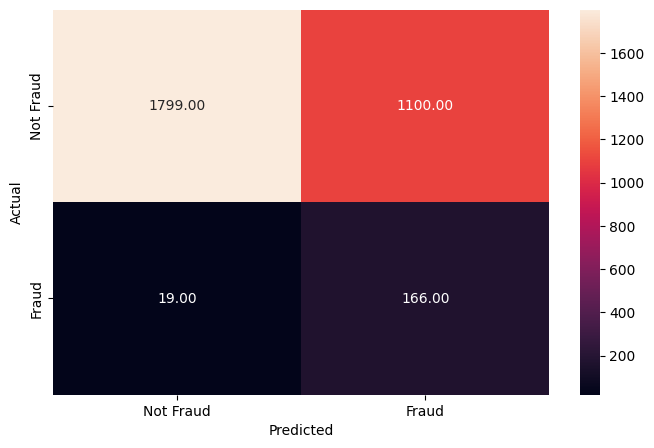

Test Accuracy:  0.6371595330739299


In [ ]:
# predicting on testing data
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test Accuracy: ', test_accuracy)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall: ", recall)

Accuracy:  0.6371595330739299
Precision:  0.13112164296998421
Recall:  0.8972972972972973


In [ ]:
cols=df_numeric.drop("FraudFound_P", axis=1).columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

0
Fault                             1.651057
AddressChange_Claim_2 to 3 years  0.559076
MaritalStatus_Married             0.322536
PolicyType_Sport - Collision      0.267281
AgentType                         0.253055
...                                    ...
Make_Pontiac                     -0.363690
Make_Honda                       -0.380013
VehicleCategory_Sport            -0.476812
PolicyType_Sedan - Liability     -0.548272
BasePolicy_Liability             -0.568032

[66 rows x 1 columns]

### Observations


*   The Logistic Regression model performs similarly on the testing set (0.64) and training set (0.77) in terms of accuracy, meaning the model does not overfit and generalizes well.
*   On both the training and testing data, the model has higher scores for precision on class 0 and recall on class 1, meaning the model has less false negatives of fraud and can accuratly identify cases that are not fraud.
*   The high recall score on both the training set (0.92) and the testing saet (0.90) means the model performs well on identifying fraud.




<h3> Checking coefficients for Eliminate Insignificant Predictors <h3>



In [ ]:
# Extract column names from the original DataFrame
cols = df_numeric.drop("FraudFound_P", axis=1).columns
coef_lg = lg.coef_[0]  # Coefficients for the logistic regression model

# Convert the log odds to simple odds
odds = np.exp(coef_lg)  # Exponentiate coefficients to calculate odds

# Create a DataFrame for odds and sort them
odds_df = pd.DataFrame(odds, index=cols, columns=['odds']).sort_values(
    by='odds', ascending=False)

odds_df.head(30)

odds
Fault                               5.212486
AddressChange_Claim_2 to 3 years    1.749056
MaritalStatus_Married               1.380625
PolicyType_Sport - Collision        1.306408
AgentType                           1.287954
MaritalStatus_Single                1.287591
Sex                                 1.207412
AddressChange_Claim_no change       1.079526
AddressChange_Claim_under 6 months  1.075310
PastNumberOfClaims_2 to 4           1.049331
WeekOfMonthClaimed                  1.035303
MaritalStatus_Widow                 1.034393
AccidentArea                        1.030476
NumberOfCars_3 to 4                 1.029428
Deductible                          1.022790
AddressChange_Claim_4 to 8 years    1.010366
PolicyType_Utility - All Perils     1.010087
Days_Policy_Accident_none           1.002818
PolicyType_Utility - Collision      0.987230
Days_Policy_Claim_8 to 15           0.977443
NumberOfCars_2 vehicles             0.975077
VehiclePrice                        0.973232
Make_BMW                            0.969608
PastNumberOfClaims_none             0.967561
DriverRating                        0.966077
Make_Saab                           0.965931
NumberOfCars_5 to 8                 0.964266
Year                                0.960501
Make_Saturn                         0.957193
PolicyType_Sport - Liability        0.955529

In [ ]:
X_train_coeff = pd.DataFrame(X_train, columns = df_numeric.drop("FraudFound_P", axis=1).columns)

# Analyze logistic regression coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_coeff.columns,
    'Coefficient': lg.coef_.flatten()
})

coefficients['Exp(Coefficient)'] = np.exp(coefficients['Coefficient'])  # Exponentiated coefficient
coefficients['AbsoluteValue'] = coefficients['Coefficient'].abs()  # Take absolute values for sorting
coefficients = coefficients.sort_values(by='AbsoluteValue', ascending=False)  # Sort by significance
print(coefficients)

                             Feature  Coefficient  Exp(Coefficient)  \
5                              Fault     1.651057          5.212486   
65              BasePolicy_Liability    -0.568032          0.566640   
56  AddressChange_Claim_2 to 3 years     0.559076          1.749056   
37      PolicyType_Sedan - Liability    -0.548272          0.577948   
44             VehicleCategory_Sport    -0.476812          0.620759   
..                               ...          ...               ...   
8                         Deductible     0.022534          1.022790   
42    PolicyType_Utility - Collision    -0.012852          0.987230   
57  AddressChange_Claim_4 to 8 years     0.010313          1.010366   
41   PolicyType_Utility - All Perils     0.010037          1.010087   
49         Days_Policy_Accident_none     0.002814          1.002818   

    AbsoluteValue  
5        1.651057  
65       0.568032  
56       0.559076  
37       0.548272  
44       0.476812  
..            ...  
8      

In [ ]:
threshold = 0.05

coefficients_to_drop = coefficients[ (coefficients['Exp(Coefficient)'] >= (1 - threshold)) & (coefficients['Exp(Coefficient)'] <= (1 + threshold))]['Feature']
print("Features to drop (close to 1):")
print(coefficients_to_drop.tolist())

Features to drop (close to 1):
['Days_Policy_Accident_more than 30', 'PastNumberOfClaims_2 to 4', 'Make_Mercury', 'PolicyType_Sport - Liability', 'Make_Saturn', 'Year', 'NumberOfCars_5 to 8', 'WeekOfMonthClaimed', 'Make_Saab', 'DriverRating', 'MaritalStatus_Widow', 'PastNumberOfClaims_none', 'Make_BMW', 'AccidentArea', 'NumberOfCars_3 to 4', 'VehiclePrice', 'NumberOfCars_2 vehicles', 'Days_Policy_Claim_8 to 15', 'Deductible', 'PolicyType_Utility - Collision', 'AddressChange_Claim_4 to 8 years', 'PolicyType_Utility - All Perils', 'Days_Policy_Accident_none']


In [ ]:
X_train_reduced = pd.DataFrame(X_train, columns=X_train_coeff.columns).drop(columns=coefficients_to_drop)
X_test_reduced = pd.DataFrame(X_test, columns=X_train_coeff.columns).drop(columns=coefficients_to_drop)

# Redo Logistic Regression after Features Reduced

In [ ]:
lg2 = LogisticRegression(random_state=42, class_weight='balanced')

# fitting model on Training data
lg2.fit(X_train_reduced, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2899
           1       0.13      0.90      0.23       185

    accuracy                           0.64      3084
   macro avg       0.56      0.76      0.49      3084
weighted avg       0.94      0.64      0.73      3084



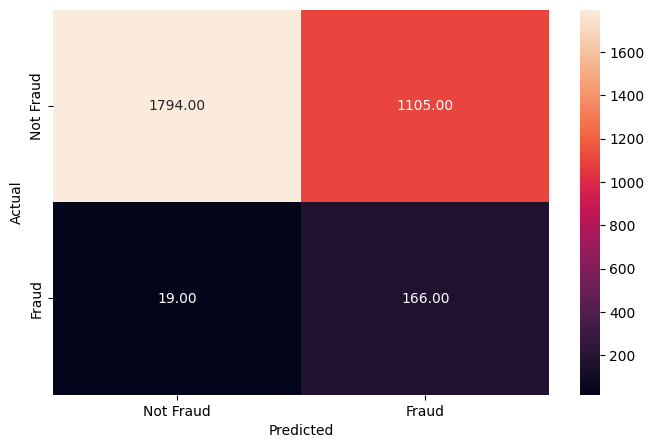

Test Accuracy:  0.6355382619974059


In [ ]:
# predicting on testing data
y_pred_test = lg2.predict(X_test_reduced)
metrics_score(y_test, y_pred_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test Accuracy: ', test_accuracy)

### Observations



*   The accuracy for this testing data (0.64) is similar to the model's accuracy before dropping any features.
*   The precision for class 0 (0.99) and recall for class 1 (0.90) is also similar to the model's performance before dropping any features.



## **K Nearest Neighbors**

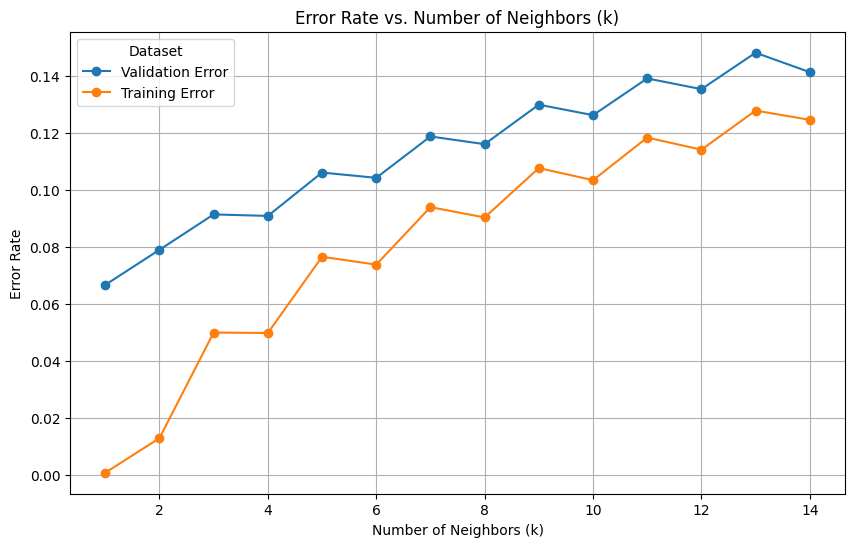

In [ ]:
knn = KNeighborsClassifier()

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()

for k in range(1,15):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        X_train_new, X_val, y_train_new, y_val = train_test_split(
            X_train_reduced, y_train, test_size=0.20)

        #Fitting knn on training data
        knn.fit(X_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(X_train_new, y_train_new))
        test_error.append(1 - knn.score(X_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

# Initialize lists to store k values and corresponding error rates for testing and training
kltest = []  # For storing k values for validation error
vltest = []  # For storing validation error rates

kltrain = []  # For storing k values for training error
vltrain = []  # For storing training error rates

# Extract validation error rates for each k from the knn_many_split dictionary
for k, v in knn_many_split.items():
    kltest.append(k)  # Add the current k value
    vltest.append(knn_many_split[k][1])  # Add the validation error for the current k

# Extract training error rates for each k from the knn_many_split dictionary
for k, v in knn_many_split.items():
    kltrain.append(k)  # Add the current k value
    vltrain.append(knn_many_split[k][0])  # Add the training error for the current k

# Plotting k values vs. error rates for both training and validation datasets
plt.figure(figsize=(10, 6))
plt.plot(kltest, vltest, label='Validation Error', marker='o')  # Plot validation error with markers
plt.plot(kltrain, vltrain, label='Training Error', marker='o')  # Plot training error with markers

# Add title and labels to the plot for better understanding
plt.title('Error Rate vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')  # Label for the x-axis, indicating different k values
plt.ylabel('Error Rate')  # Label for the y-axis, showing error rates

# Add a grid for easier visualization of the plot
plt.grid(True)

# Add a legend to differentiate between the training and validation error lines
plt.legend(title='Dataset')

plt.show()

<h3> After finding the Optimal number of k(3) Neighbors, let's fit the Model

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     11598
           1       0.92      0.99      0.96     11598

    accuracy                           0.96     23196
   macro avg       0.96      0.96      0.96     23196
weighted avg       0.96      0.96      0.96     23196



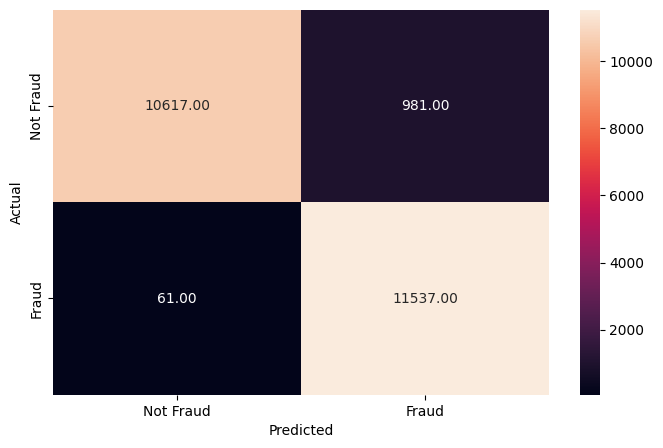

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      2899
           1       0.15      0.40      0.22       185

    accuracy                           0.83      3084
   macro avg       0.55      0.63      0.56      3084
weighted avg       0.91      0.83      0.86      3084



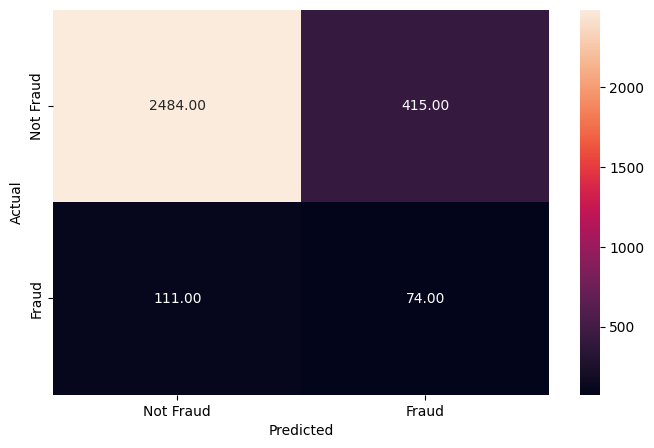

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

#fitting data to the KNN model
knn.fit(X_train_reduced, y_train)

#checking the performance of knn model
y_pred_train_knn = knn.predict(X_train_reduced)
metrics_score(y_train, y_pred_train_knn)

y_pred_test_knn = knn.predict(X_test_reduced)
metrics_score(y_test, y_pred_test_knn)

### Observations


*   For accuracy, the KNN model performs well on both the training data **(0.96)** and on the testing data **(0.83)**.
*   On the training, the model can identify most cases of fraud. However, the model does not generalize as well to class 1 on the testing set, with a poor recall score **(0.40)**.
*   F1 score indicates the model balances precision and recall well on the training data **(0.92)** and but not on the testing data **(0.22)**.



## **Support Vector Model**

Since this dataset is considered Small, we can also try to implement SVM

In [ ]:
#fitting qda model
svm = SVC()
svm.fit(X_train_reduced, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     11598
           1       0.79      0.95      0.86     11598

    accuracy                           0.85     23196
   macro avg       0.86      0.85      0.85     23196
weighted avg       0.86      0.85      0.85     23196



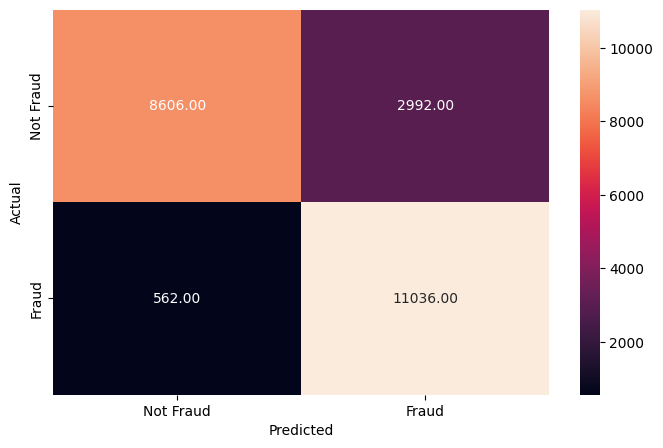

In [ ]:
#Train data model performance
y_pred_train_svm = svm.predict(X_train_reduced)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      2899
           1       0.14      0.71      0.24       185

    accuracy                           0.73      3084
   macro avg       0.56      0.72      0.54      3084
weighted avg       0.93      0.73      0.80      3084



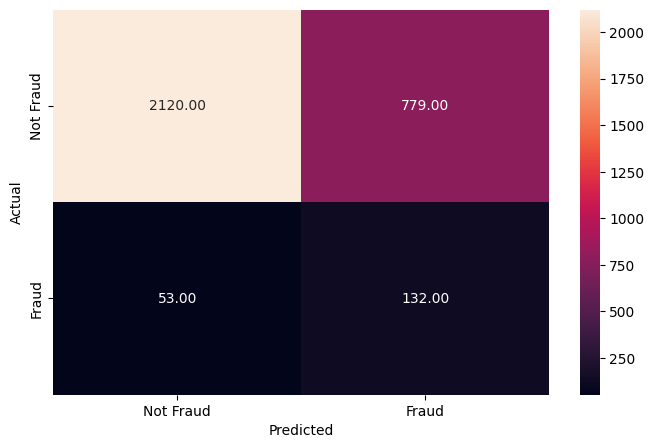

In [ ]:
#Test data model performance
y_pred_test_svm = svm.predict(X_test_reduced)
metrics_score(y_test, y_pred_test_svm)

### Observations

- High recall (71%) for class 1 means it identifies a majority of fraudulent claims.
- Precision (14%) is slightly better than Logistic Regression.
- Model complexity and lack of explainability can hinder adoption in regulatory environments.
- Useful as part of an ensemble but not as a standalone solution.

## **Random Forest**

In [ ]:
#Fitting the decision tree classifier on the training datarf_estimator
rf_estimator = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_estimator.fit(X_train_reduced, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11598
           1       1.00      1.00      1.00     11598

    accuracy                           1.00     23196
   macro avg       1.00      1.00      1.00     23196
weighted avg       1.00      1.00      1.00     23196



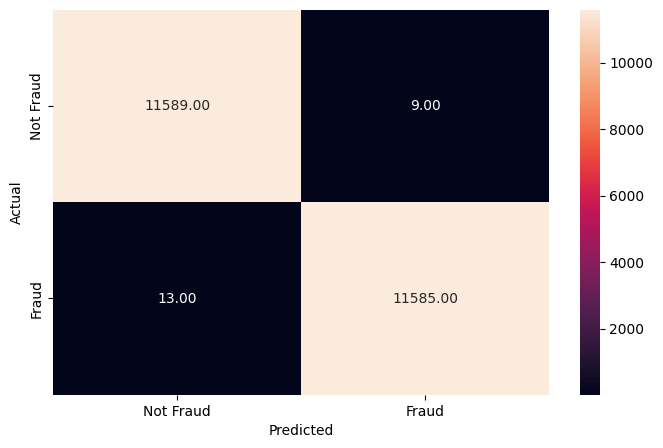

In [ ]:
# Training data performance
y_pred_train_rf = rf_estimator.predict(X_train_reduced)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2899
           1       0.22      0.13      0.16       185

    accuracy                           0.92      3084
   macro avg       0.58      0.55      0.56      3084
weighted avg       0.90      0.92      0.91      3084



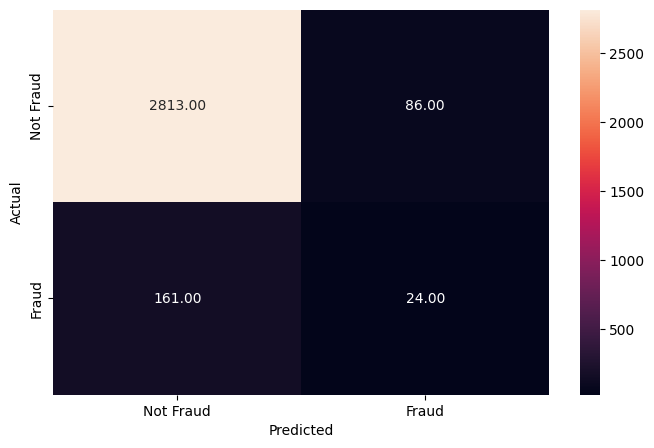

In [ ]:
# Test data performance
y_pred_test_rf = rf_estimator.predict(X_test_reduced)
metrics_score(y_test, y_pred_test_rf)

### Observations


*   For accuracy, the Random Forest model performs well on the training data **(1.00)** and on the testing data **(0.92)**.
*   Although the model has 0.92 accuracy on the testing data, its poor performance on class 1 suggests it does not generalizes well, which is evidence of overfitting.
*   F1 score indicates the model does not balance precision and recall well on the testing data **(0.16)**. The score on recall for the testing data **(0.13)** means the model might have many false negatives and does not identify cases of fraud well.



<h3> Random Forest Hyperparameter Tuning




In [ ]:
rf_estimator_tuned = RandomForestClassifier(class_weight='balanced', random_state=42)

 # Grid of parameters to choose from
params_rf = {
        "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'auto'],
 }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train_reduced, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train_reduced, y_train)

RandomForestClassifier(class_weight='balanced', max_features=0.7,
                       n_estimators=500, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11598
           1       1.00      1.00      1.00     11598

    accuracy                           1.00     23196
   macro avg       1.00      1.00      1.00     23196
weighted avg       1.00      1.00      1.00     23196



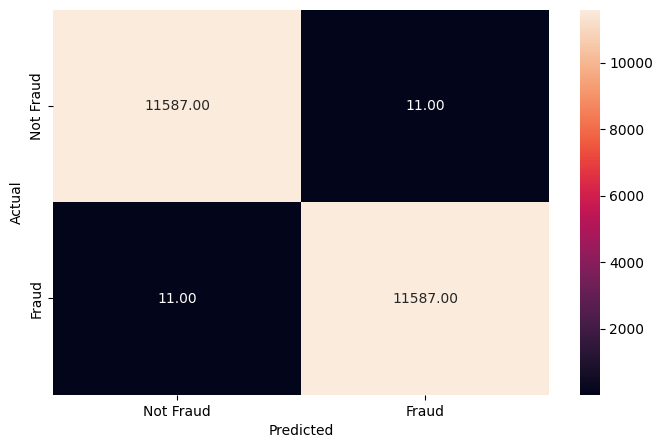

In [ ]:
#training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train_reduced)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2899
           1       0.23      0.13      0.16       185

    accuracy                           0.92      3084
   macro avg       0.59      0.55      0.56      3084
weighted avg       0.90      0.92      0.91      3084



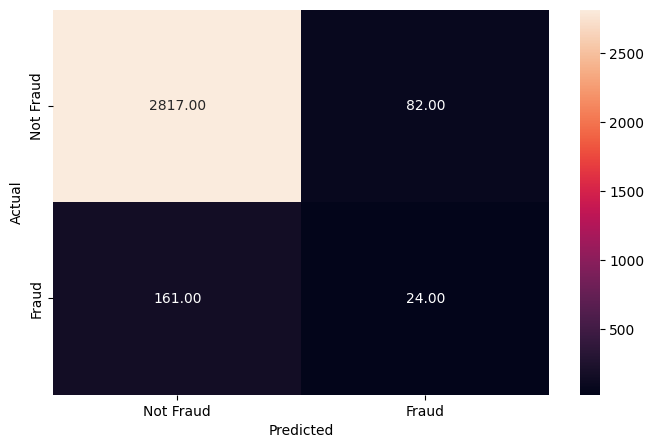

In [ ]:
#test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test_reduced)
metrics_score(y_test, y_pred_test_rf_tuned)

### Observations


*   After the hyperparameter tuning, for accuracy, the Random Forest model performs well on the training data **(1.00)** and on the testing data **(0.92)**, which is similar to before the tuning.
*   Although the model has 0.92 accuracy on the testing data, its poor performance on class 1 suggests it does not generalizes well, which is evidence of overfitting.
*   F1 score indicates the model does not balance precision and recall well on the testing data **(0.18)**. The score on recall for the testing data **(0.14)** means the model might have many false negatives and does not identify cases of fraud well.
*   Hyperparameter tuning doesn't appear to help with the model performance.



# 10. Ensemble Method


              precision    recall  f1-score   support

           0       0.96      0.90      0.92      2899
           1       0.18      0.36      0.24       185

    accuracy                           0.86      3084
   macro avg       0.57      0.63      0.58      3084
weighted avg       0.91      0.86      0.88      3084



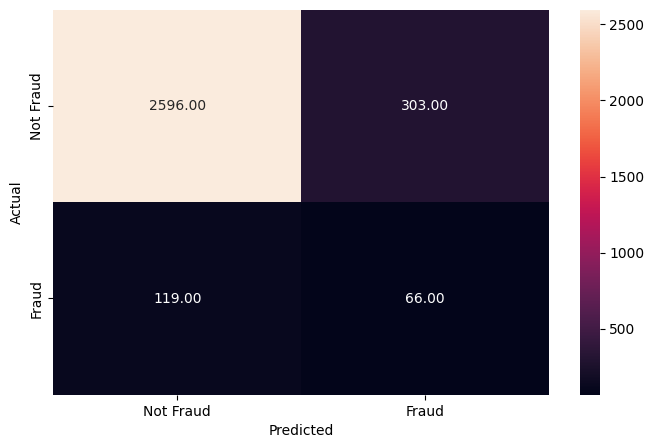

In [ ]:
from sklearn.ensemble import VotingClassifier

# Select three models to compare
# - knn
# - svm
# - rf_estimator # Random Forest

# Create a voting classifier with the selected models
# Set probability=True in SVC to enable predict_proba
svm = SVC(probability=True)

voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svm),
    ('rf', rf_estimator)
], voting='soft')


# Train the voting classifier
voting_clf.fit(X_train_reduced, y_train)


# Make predictions using the voting classifier
y_pred_voting = voting_clf.predict(X_test_reduced)

# Evaluate the voting classifier
metrics_score(y_test, y_pred_voting)

### Observations


*   For the ensemble method of averaging the KNearestNeighbors model, Support Vector Model, and Random Forest model, the accuracy is **0.86** which suggests the new classifier is relatively accurate on the test data.
*   However, the recall score on the class 1 is **0.36**, which suggests somewhat poor performance on predicting cases of fraud.
*   F1 score on the ensemble methods for class 1 **(0.24)** indicates a poor balance between precision and recall.


# 11. AUC

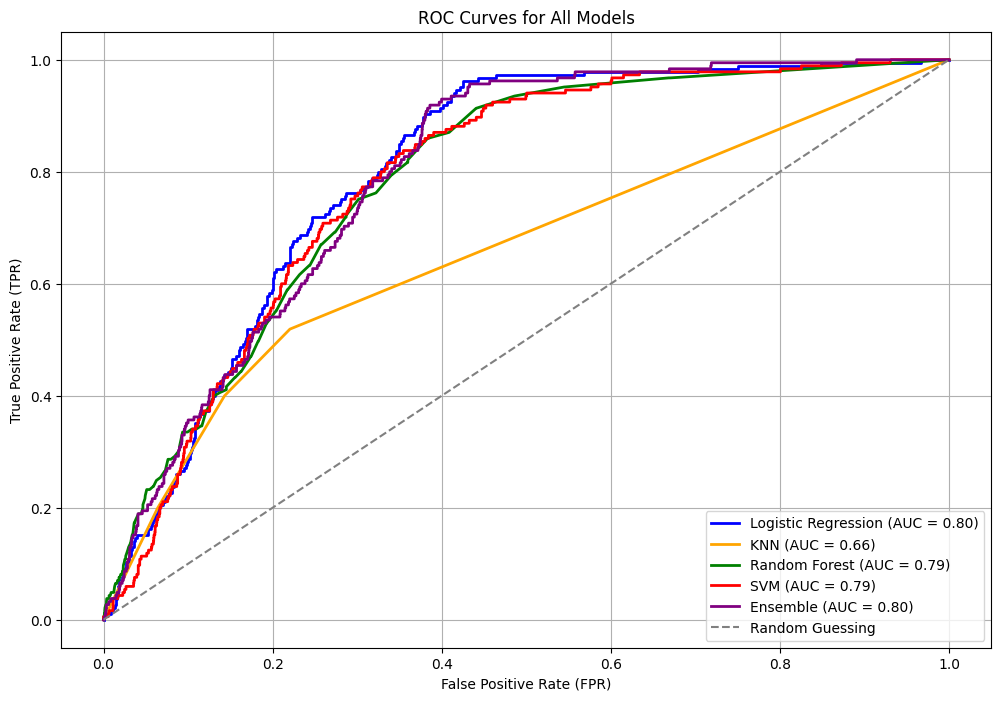

AUC Scores:
Logistic Regression: 0.80
KNN: 0.66
Random Forest: 0.79
SVM: 0.79
Ensemble: 0.80


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

svm = SVC(probability=True, random_state=42)  # Enable probability estimation
svm.fit(X_train_reduced, y_train)

# Initialize a dictionary to store ROC and AUC results
roc_results = {}

# Function to plot ROC Curve for a given model
def plot_roc_curve(model_name, y_true, y_proba, color):
    # Calculate FPR, TPR
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    roc_results[model_name] = auc_score

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', color=color, lw=2)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Logistic Regression
y_proba_lg = lg.predict_proba(X_test)[:, 1]  # Predict probabilities for positive class
plot_roc_curve("Logistic Regression", y_test, y_proba_lg, color='blue')

# KNN
y_proba_knn = knn.predict_proba(X_test_reduced)[:, 1]  # Predict probabilities for positive class
plot_roc_curve("KNN", y_test, y_proba_knn, color='orange')

# Random Forest
y_proba_rf = rf_estimator.predict_proba(X_test_reduced)[:, 1]  # Predict probabilities for positive class
plot_roc_curve("Random Forest", y_test, y_proba_rf, color='green')

# SVM
# For SVM, we use `decision_function` because `predict_proba` is unavailable in SVC
y_score_svm = svm.decision_function(X_test_reduced)  # Get the decision function scores
plot_roc_curve("SVM", y_test, y_score_svm, color='red')

# Ensemble (e.g., Voting Classifier or a custom ensemble)
y_proba_ensemble = voting_clf.predict_proba(X_test_reduced)[:, 1]  # Get probabilities for the positive class
plot_roc_curve("Ensemble", y_test, y_proba_ensemble, color='purple')

# Add diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')


# Customize the plot
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC Scores
print("AUC Scores:")
for model_name, auc_score in roc_results.items():
    print(f"{model_name}: {auc_score:.2f}")


**Observations**
- Logistic Regression (AUC = 0.80):

  - Among the simplest models but demonstrates competitive AUC.
  - Performs well in separating fraud vs. non-fraud cases.

- kNN (AUC = 0.66):
  - Significantly lower AUC compared to others.
  - Struggles with the imbalanced dataset, making it unsuitable for this task.

- Random Forest (AUC = 0.79):
  - Solid performance, close to Logistic Regression and Ensemble.
  - Can be improved with hyperparameter tuning and resampling techniques.

- SVM (AUC = 0.79):
  - Strong performance but slightly lags behind Logistic Regression and Ensemble.
  - Requires careful tuning to achieve optimal performance.

- Ensemble (AUC = 0.80):
  - Matches Logistic Regression in AUC but combines the strengths of multiple models.
  - Likely to generalize better, offering robust predictions across varying datasets.

# 12. Interpretations


*   In the context of vehicle insurance fraud, a **false negative** (or an instance of failing to detect a case of actual fraud) is **more serious** than a false positive (an instance of incorrectly labeling a case as fraud when it is not).
*   A false positive may trigger further investigation and potential costs related to such efforts. However, a false negative could greatly cost a policy holder if they are a victim to fraud, or greatly cost the company for paying out fraudulent cases.
*   For any model in a business context, in addition to accuracy, we suggest prioritizing **recall** scores to minimize false negatives. Evidently, although the **Ensemble methods** model seems to be the most accurate and has a similar **Area Under the ROC Curve** to logistic regression, the logisitic regression has better performance on recall and predicting class 1.





#13. CONCLUSION / BUSINESS RECOMMENDATIONS



*   Our evaluation highlighted performance metrics like accuracy, recall (specifically for class 1 and cases of fraud) and area under the ROC curve, across multiple models such as Logistic Regression, KNearest Neighbors, Support Vector, Random Forest, and Ensemble Methods.
*   Based on Odd Ratios of the Coefficients in LR, the features we would like to highlight in contributing to model predictions of fraud are a **recent address change**, **marital status of married**, **Fault**, **PolicyType_Sport - Collision**, **AgentType**, **MaritalStatus_Single**, and **Sex**.
*   We have found evidence that a **Logistic Regression** model would be the most **practical for business purposes** in flagging potentially fraudulent claims for further investigation. Benefits include reducing losses and increasing efficiency for customer satisfaction.
*   Some limitations included issues with **feature engineering and model overfitting**, especially on the **Random Forest** model.
*   Future improvements could include feature engineering to utilize features that were dropped in our evaluation, such as the make of cars.

<br>

**Business Recommendation**

- **Model Selection:**

  - Deploy the Ensemble Model due to its strong performance in AUC, balanced precision-recall metrics, and robustness.
  - We can also deploy LR as it  achieves an AUC score of 0.80, which is on par with other models like the Ensemble model, but need further refinements with techniques like threshold tuning and sampling.
  - Logistic Regression serves as a reliable fallback due to its simplicity and interpretability.

- **Post-Deployment Strategy:**

  - Continuously monitor the model's AUC, precision, and recall to ensure sustained performance.
  - Adjust thresholds based on operational priorities (e.g., higher fraud recall during audits).

- **Risk Mitigation:**

  - Use AUC in conjunction with business metrics like fraud investigation cost to fine-tune model parameters.

- **Operational Insight:**

  - Claims flagged with high fraud probabilities should be prioritized for manual review.
  - Generate actionable reports based on model predictions to assist investigators.